# **Appliance Energy Prediction**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
energy_data = pd.read_excel('/content/Appliance_Energy.xlsx')

In [3]:
energy_data.head(5)

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-11-01 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-11-01 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-11-01 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-11-01 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-11-01 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53   6.60        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56   6.48        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50   6.37        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40   6.25        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40   6.13        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410390  45.410390  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

## **Descriptive Analysis:**

In [4]:
energy_data.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.412580    755.522602   
std    ...      2.014712      4.151497      5.318464      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.670000    750.933333   
50%    ...     19.390000     40.900000      6.920000    756.100000   
75%    ...     20.600000     44.338095     10.400000    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760995     24.988033   
std       14.901088      2.451221     11.794719      4.195248     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.430000     24.897653   
75%       91.666667      5.500000     40.000000      6.570000     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

## **Dimensions of the Data:**

In [5]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
energy_data.shape

(19735, 29)

In [7]:
energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
# drop date column
energy_data = energy_data.drop('date', axis=1)

In [10]:
energy_data.head()

Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...         T9   RH_9  T_out  Press_mm_hg  RH_out  \
0  19.000000  45.566667  ...  17.033333  45.53   6.60        733.5    92.0   
1  19.000000  45.992500  ...  17.066667  45.56   6.48        733.6    92.0   
2  18.926667  45.890000  ...  17.000000  45.50   6.37        733.7    92.0   
3  18.890000  45.723333  ...  17.000000  45.40   6.25        733.8    92.0   
4  18.890000  45.530000  ...  17.000000  45.40   6.13        733.9    92.0   

   Windspeed  Visibility  Tdewpoint        rv1        rv2  
0   7.000000   63.000000        5.3  13.275433  13.275433  
1   6.666667   59.166667        5.2  18.606195  18.606195  
2   6.333333   55.333333        5.1  28.642668  28.642668  
3   6.000000   51.500000        5.0  45.410390  45.410390  
4   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 28 columns]

## **Checking Null Values:**

In [11]:
energy_data.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

## **Check for missing values:**

In [12]:
energy_data.duplicated().sum()

np.int64(0)

## **Outlier Detection: Through Box Plot**

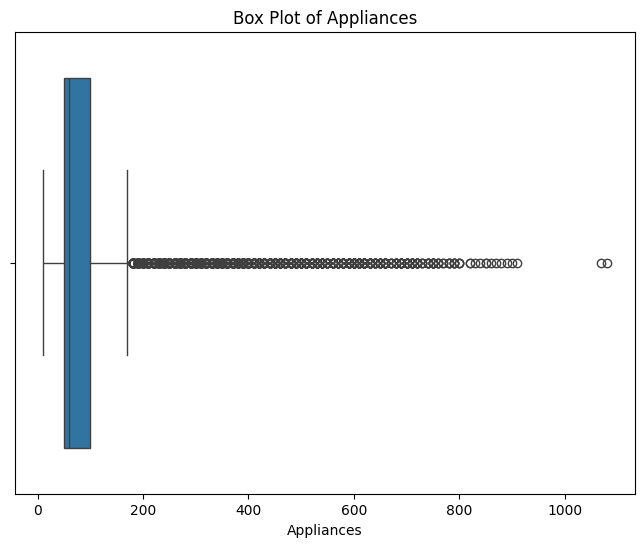

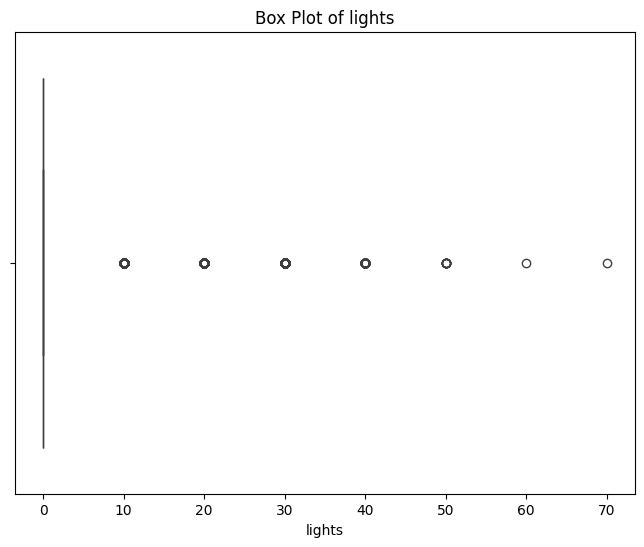

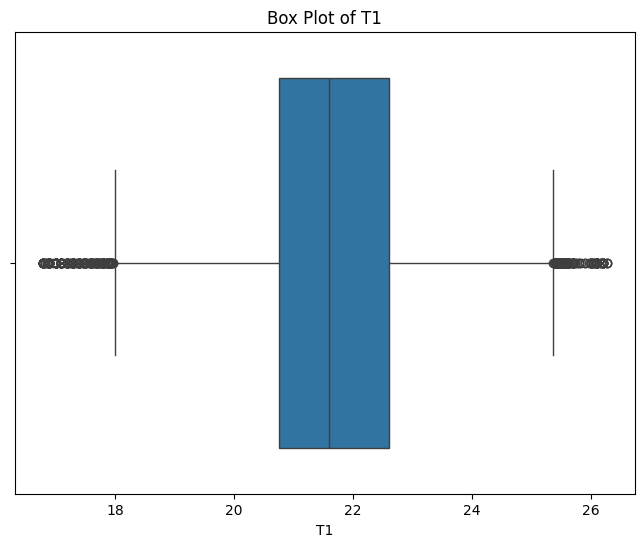

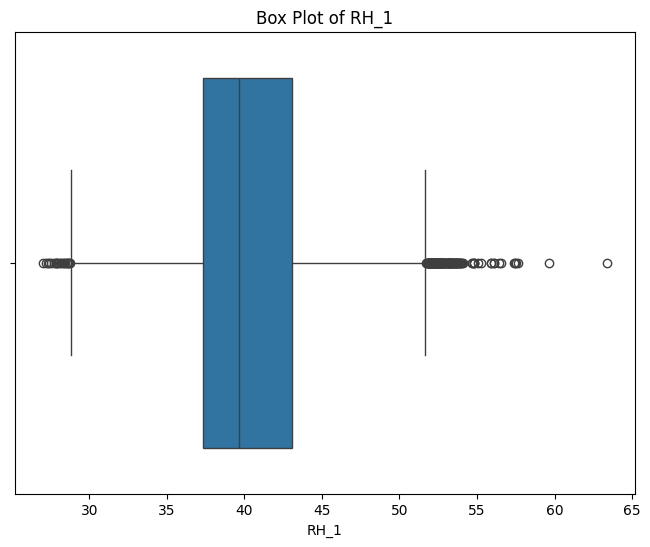

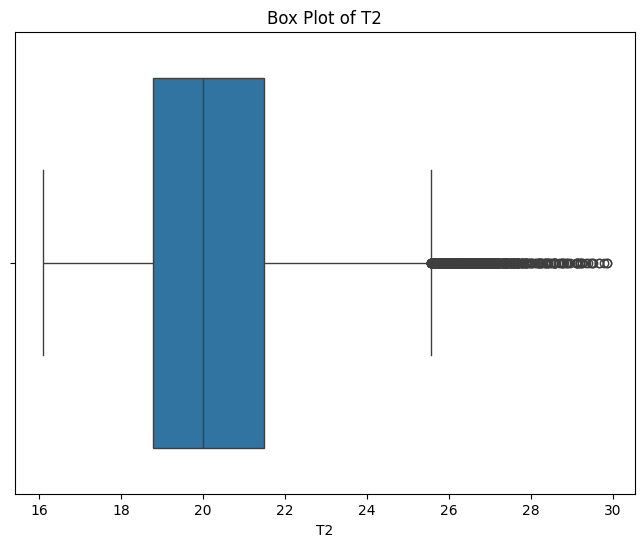

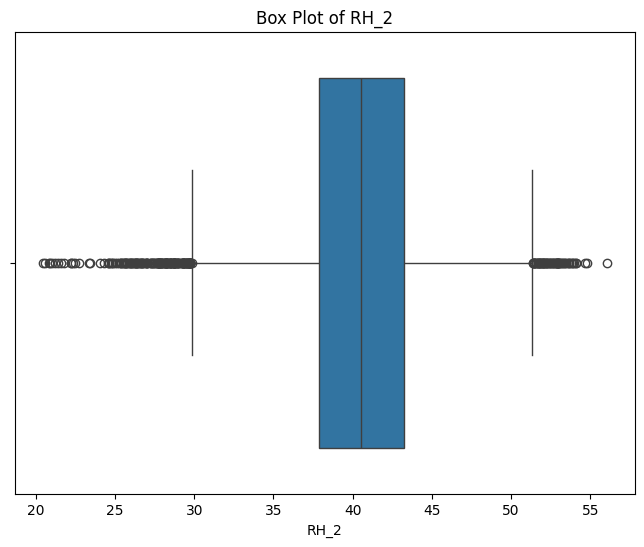

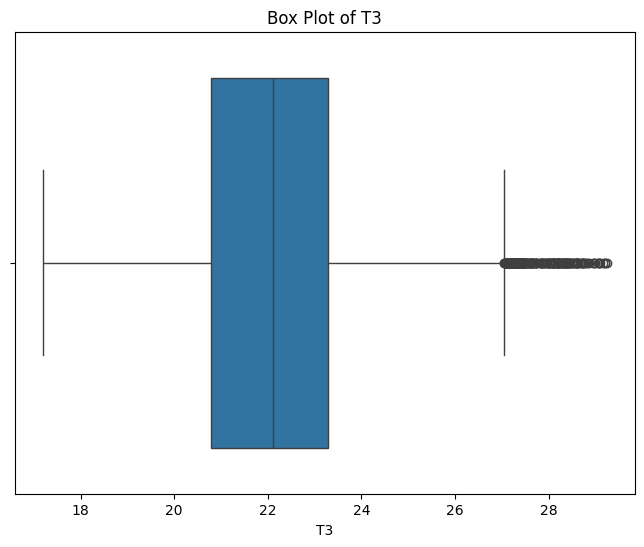

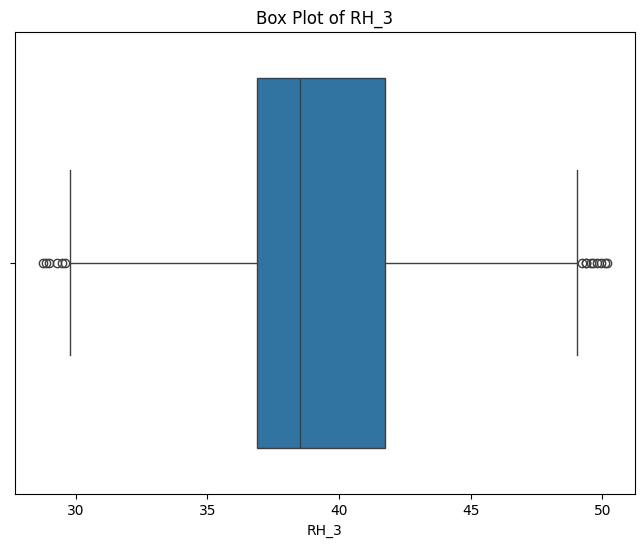

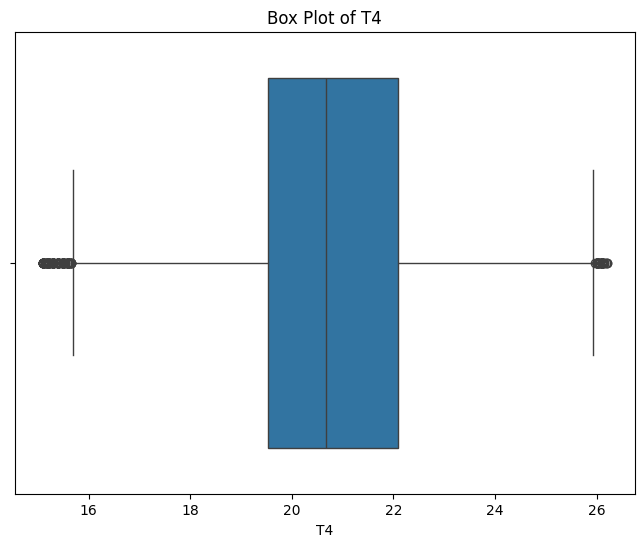

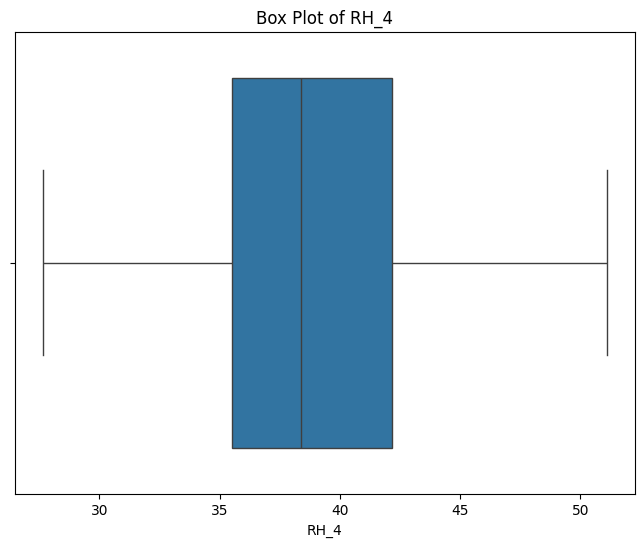

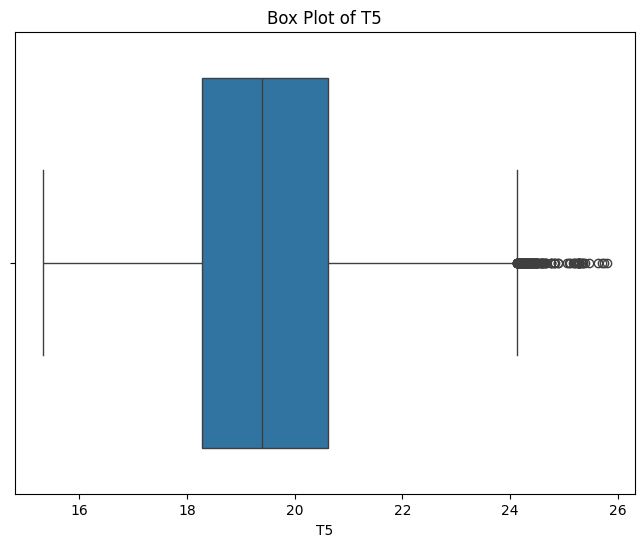

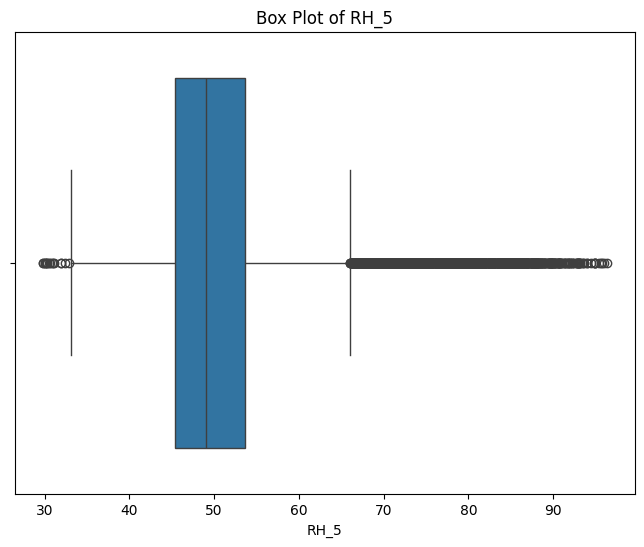

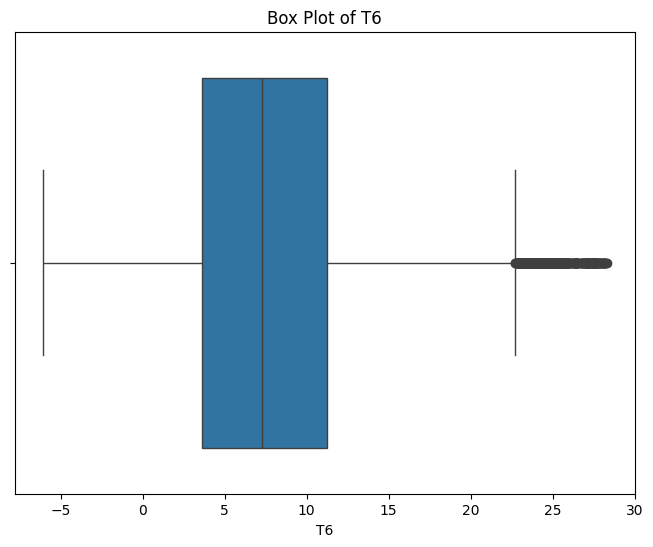

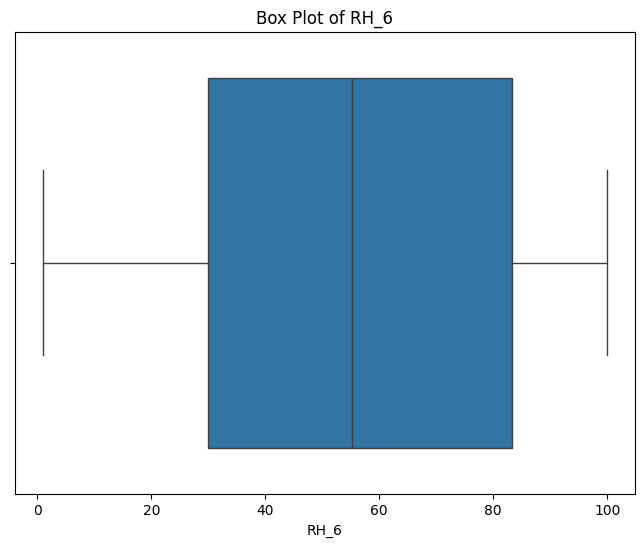

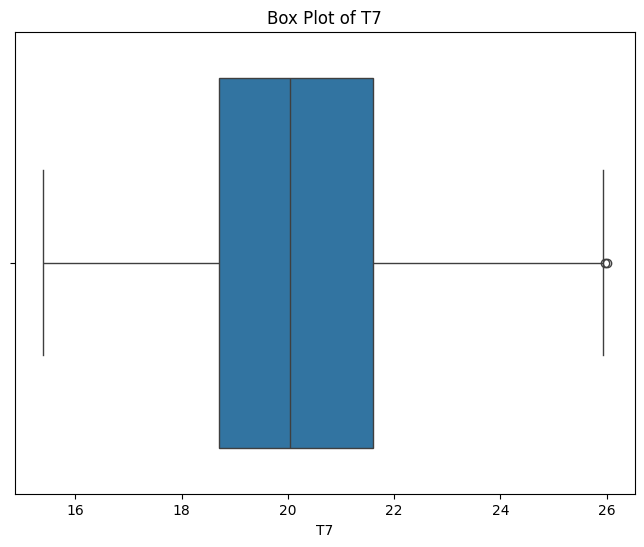

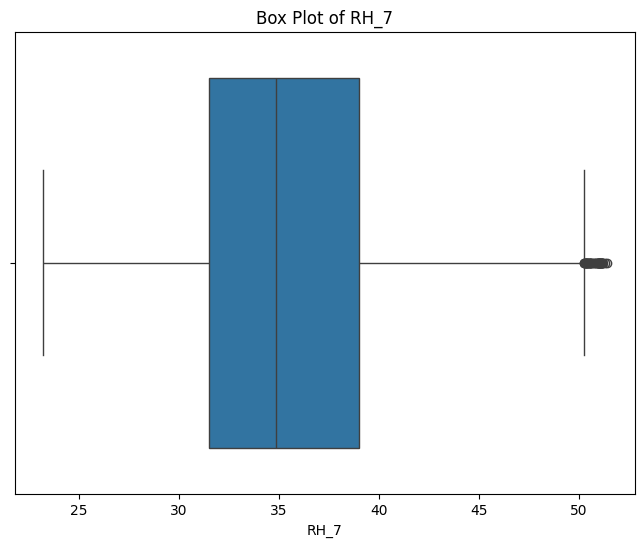

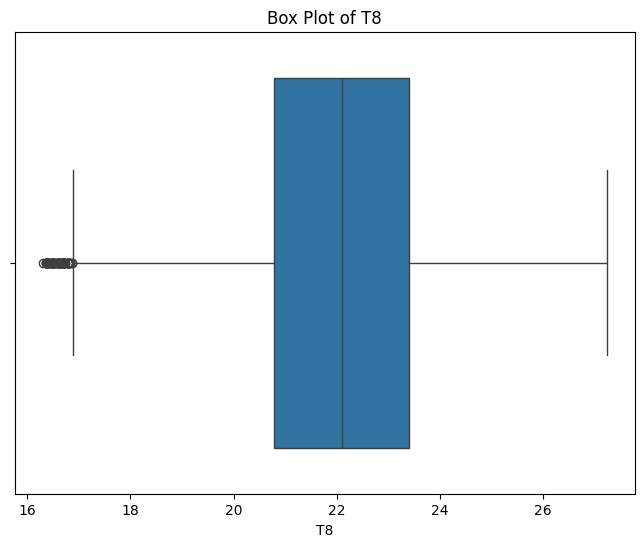

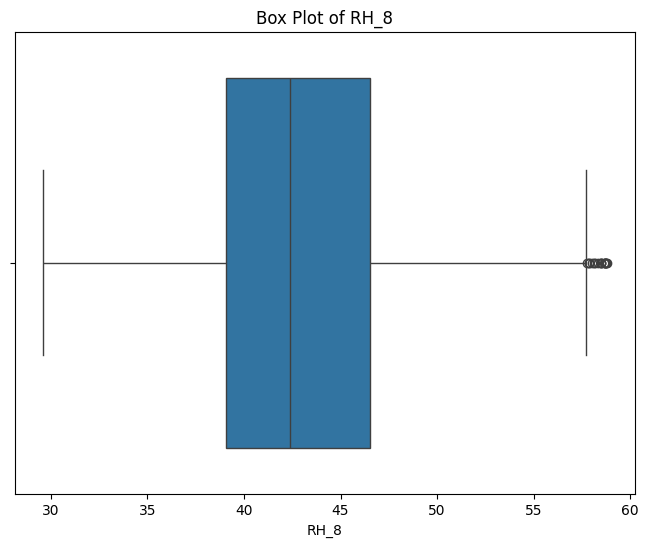

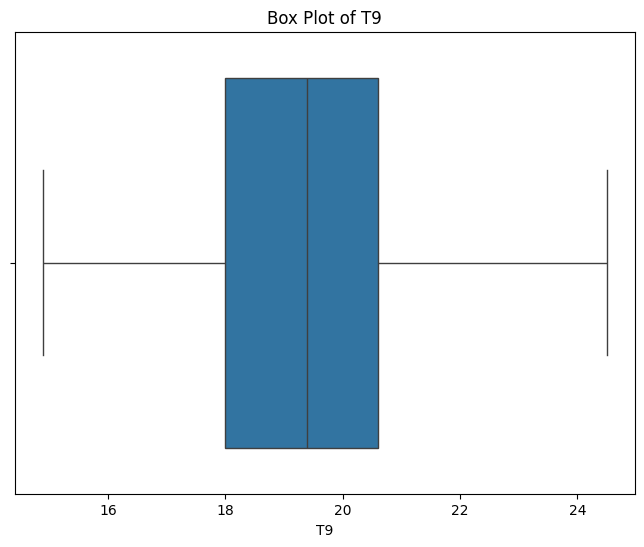

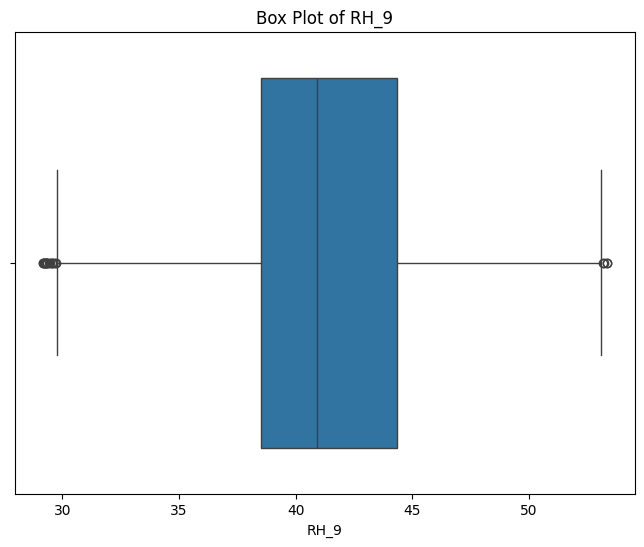

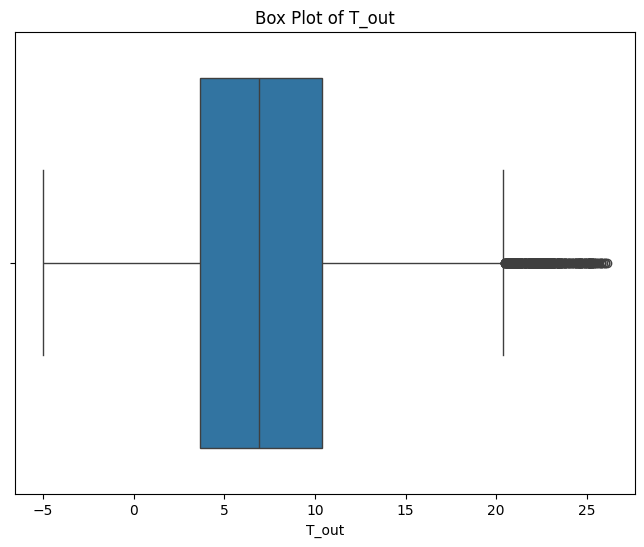

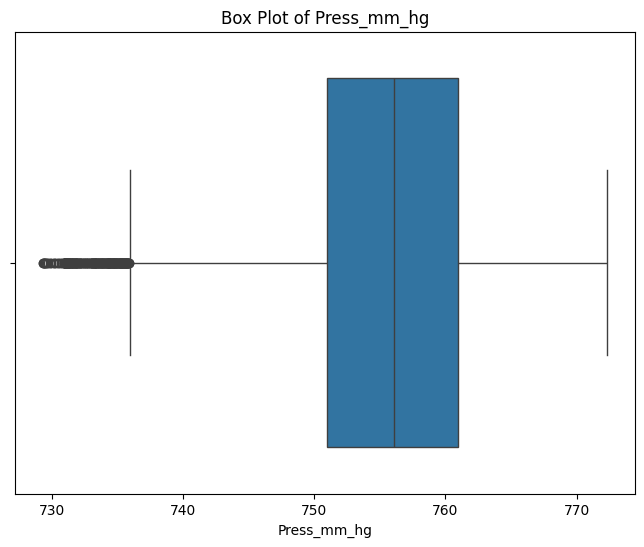

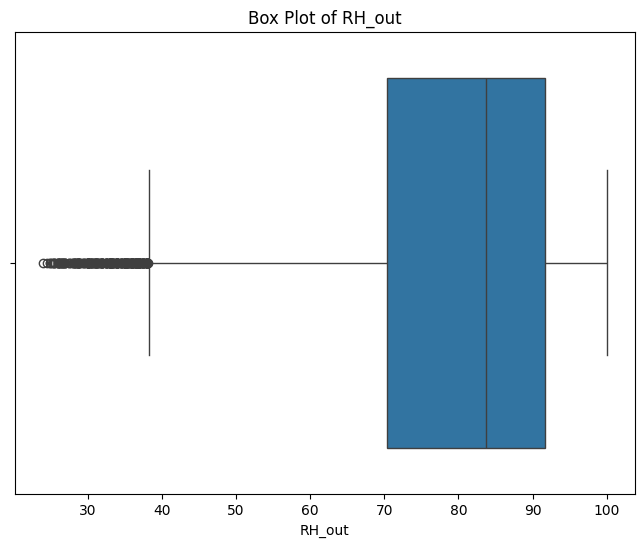

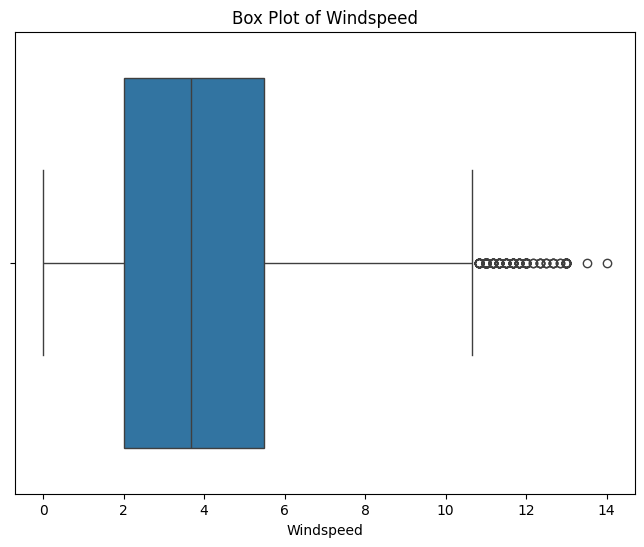

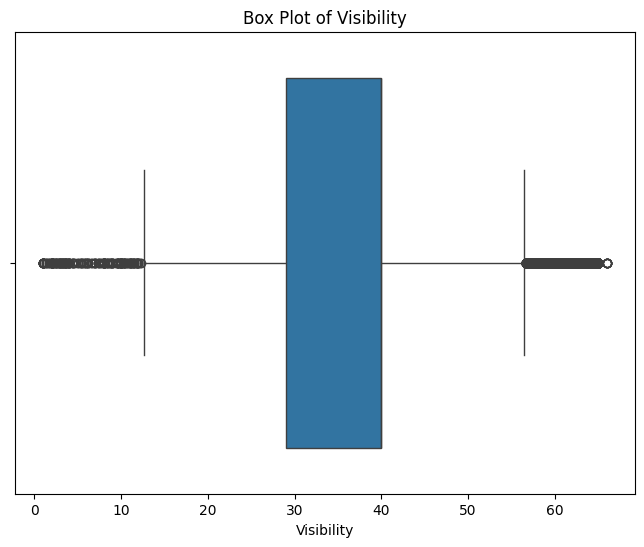

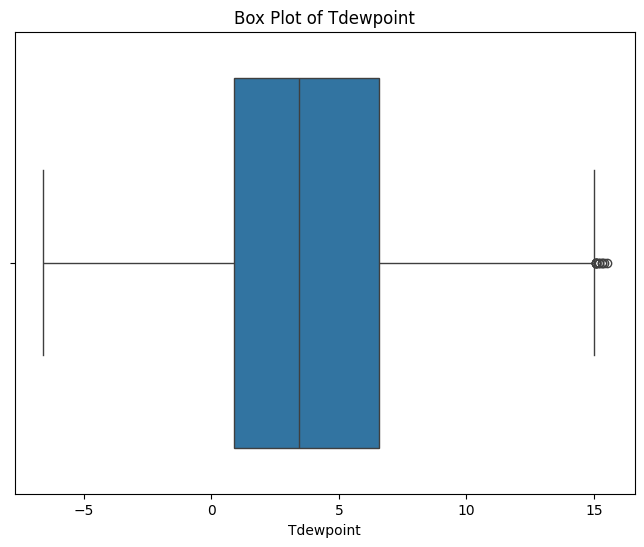

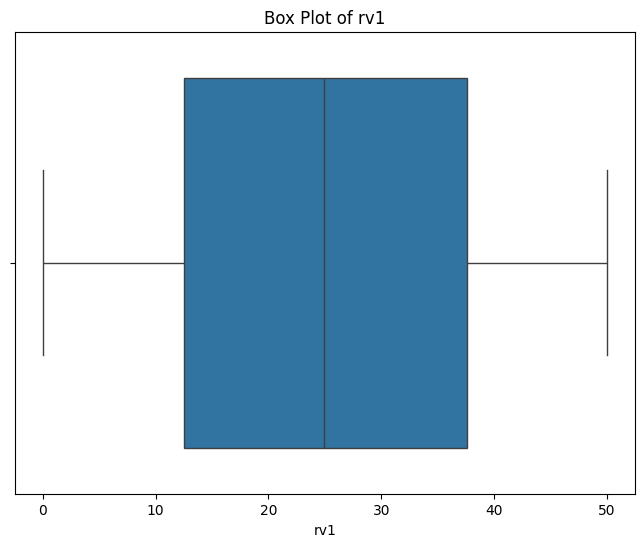

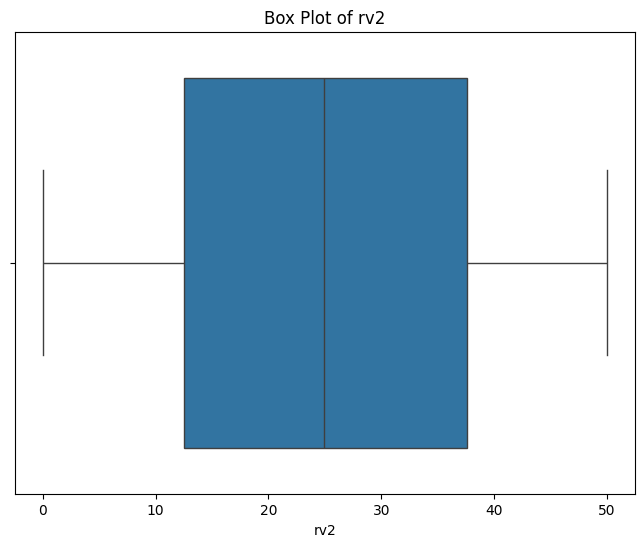

In [14]:
numeric_cols = energy_data.select_dtypes(include=['number']).columns

for col in numeric_cols:
  # Calculate Q1, Q3, and IQR
  Q1 = energy_data[col].quantile(0.25)
  Q3 = energy_data[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify outliers
  outliers = energy_data[(energy_data[col] < lower_bound) | (energy_data[col] > upper_bound)]

  # print(f"Outliers in {col}:")
  # print(outliers)

  # Plot box plot
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=energy_data[col])
  plt.title(f"Box Plot of {col}")
  plt.show()

## **Treating Outliers**

In [15]:
# treating all detected outliers in each column using Z-score(remove data points where |z| > 3)

numeric_cols = energy_data.select_dtypes(include=['number']).columns

for col in numeric_cols:
    # Calculate Z-scores
    z_scores = np.abs((energy_data[col] - energy_data[col].mean()) / energy_data[col].std())

    # Identify outliers
    outliers = energy_data[z_scores > 3]

    # print(f"Outliers in {col} (Z-score > 3):")
    # print(outliers)

    # Remove outliers
    energy_data = energy_data[z_scores <= 3]

print("\nDataFrame after removing outliers:")
energy_data



DataFrame after removing outliers:


Appliances  lights         T1       RH_1         T2       RH_2  \
27            100      20  21.356667  45.826667  20.666667  45.163333   
28            100      20  21.390000  45.690000  20.700000  45.060000   
29            100      20  21.500000  45.333333  20.700000  44.933333   
30            110      20  21.500000  45.126667  20.790000  44.633333   
31            400      20  21.533333  44.966667  20.790000  44.360000   
...           ...     ...        ...        ...        ...        ...   
19692         190       0  24.100000  48.333333  26.850000  39.750000   
19693          70       0  24.166667  48.460000  26.890000  39.564286   
19694         400       0  24.230000  48.466667  26.790000  39.500000   
19696         330       0  24.323333  47.833333  26.680000  39.696000   
19697         250       0  24.390000  47.566667  26.628571  39.928571   

              T3       RH_3         T4       RH_4  ...         T9       RH_9  \
27     20.390000  46.090000  19.390000  47.500000  ...  16.890000  44.790000   
28     20.390000  46.090000  19.426667  47.993333  ...  16.890000  44.700000   
29     20.390000  46.060000  19.566667  48.466667  ...  16.890000  44.700000   
30     20.390000  46.000000  19.666667  48.093333  ...  16.823333  44.590000   
31     20.426667  45.933333  19.600000  47.500000  ...  16.823333  44.530000   
...          ...        ...        ...        ...  ...        ...        ...   
19692  27.666667  43.360000  24.500000  44.500000  ...  23.000000  46.090000   
19693  27.700000  42.766667  24.500000  44.500000  ...  23.000000  46.163333   
19694  27.633333  42.226667  24.463333  44.430000  ...  23.033333  46.156667   
19696  27.666667  42.423333  24.500000  44.363333  ...  23.033333  46.156667   
19697  27.926667  42.993333  24.500000  44.363333  ...  23.100000  46.290000   

       T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
27      5.80   735.600000  87.500000   6.000000   40.000000       3.80   
28      5.73   735.666667  87.666667   6.000000   40.000000       3.77   
29      5.67   735.733333  87.833333   6.000000   40.000000       3.73   
30      5.60   735.800000  88.000000   6.000000   40.000000       3.70   
31      5.65   735.883333  87.833333   6.166667   40.000000       3.72   
...      ...          ...        ...        ...         ...        ...   
19692  18.20   756.200000  71.000000   2.000000   63.000000      12.80   
19693  18.50   756.183333  70.333333   1.833333   63.333333      12.90   
19694  18.80   756.166667  69.666667   1.666667   63.666667      13.10   
19696  19.40   756.133333  68.333333   1.333333   64.333333      13.40   
19697  19.70   756.116667  67.666667   1.166667   64.666667      13.60   

             rv1        rv2  
27     19.119398  19.119398  
28     43.484542  43.484542  
29     17.017450  17.017450  
30     24.104006  24.104006  
31     29.978291  29.978291  
...          ...        ...  
19692  48.402928  48.402928  
19693  26.670008  26.670008  
19694   3.673609   3.673609  
19696   2.349840   2.349840  
19697   9.110549   9.110549  

[17115 rows x 28 columns]

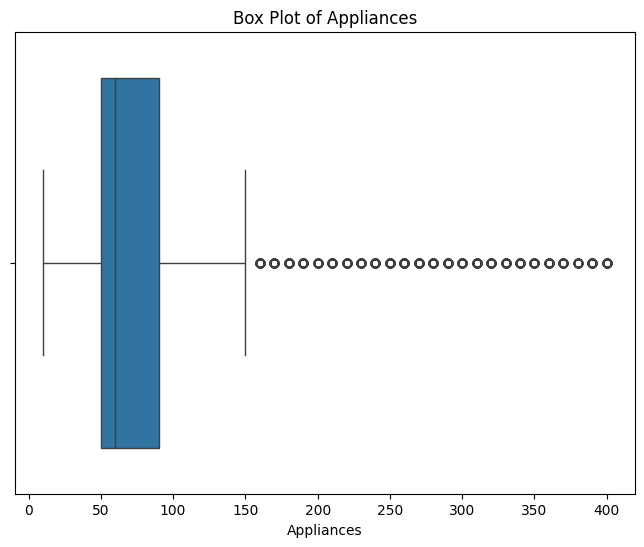

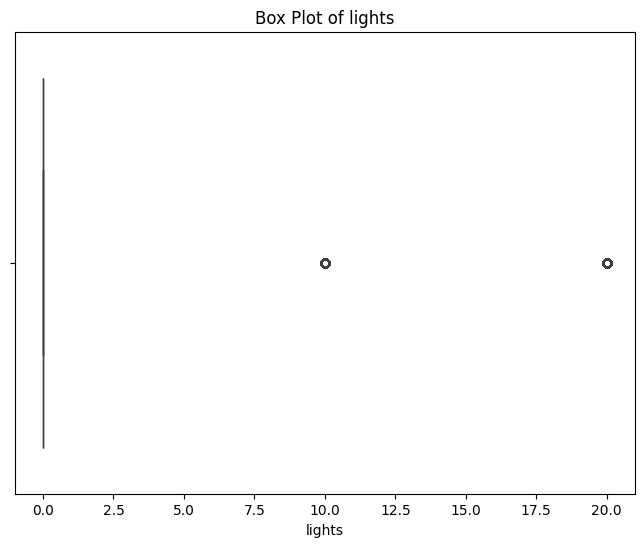

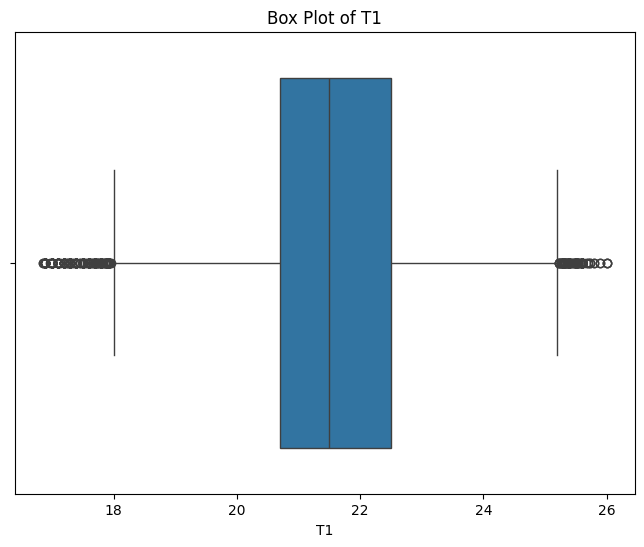

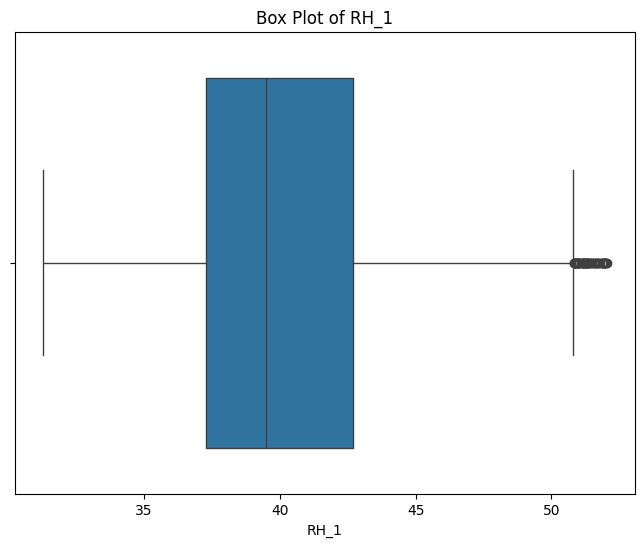

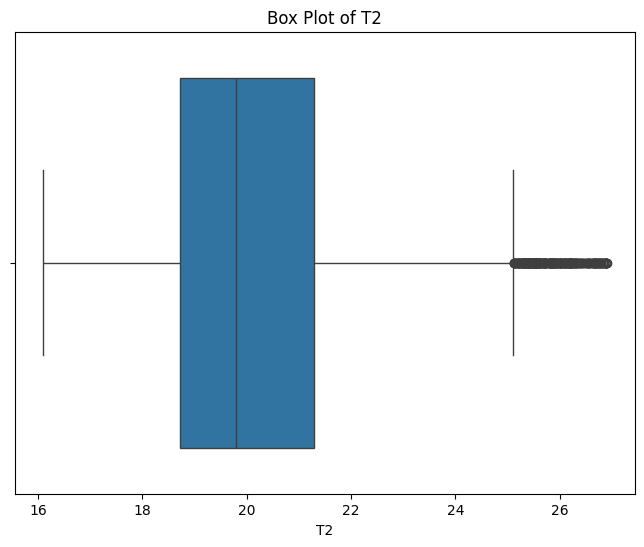

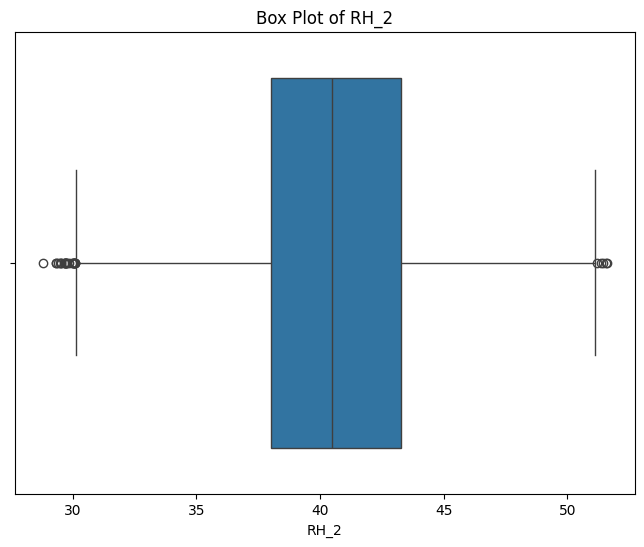

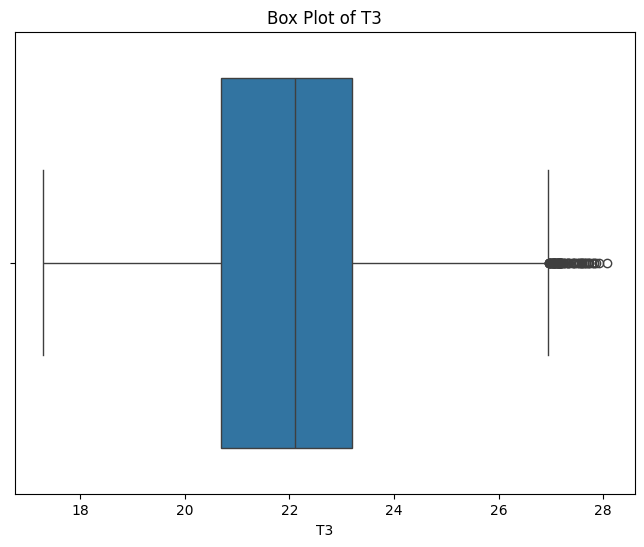

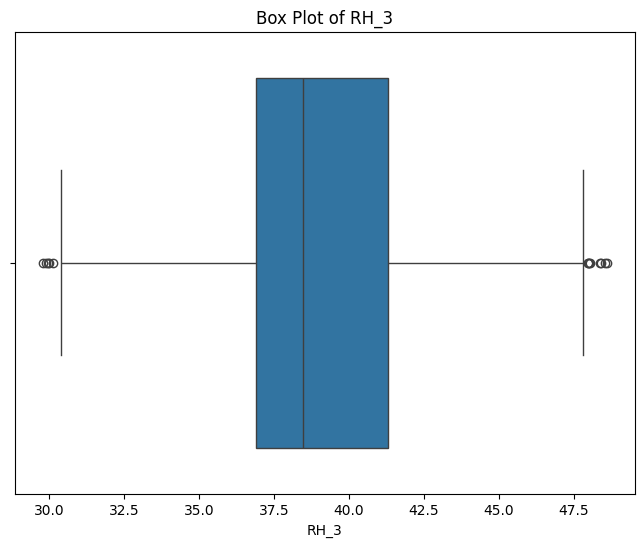

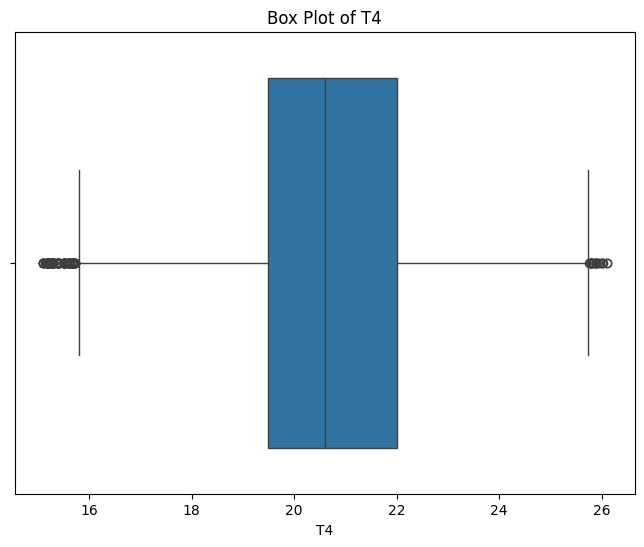

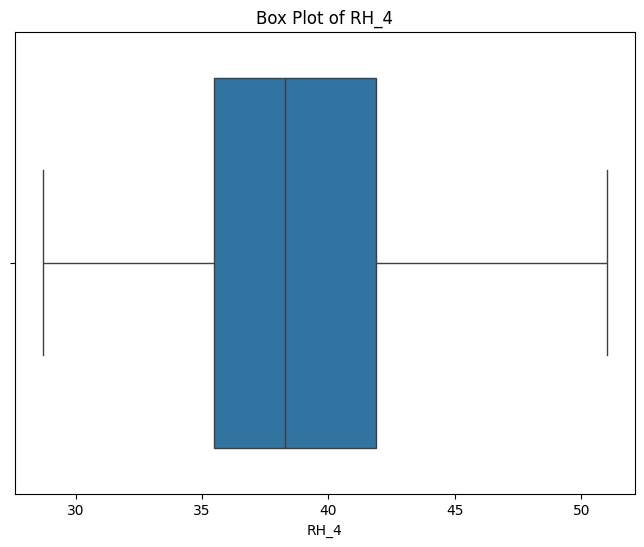

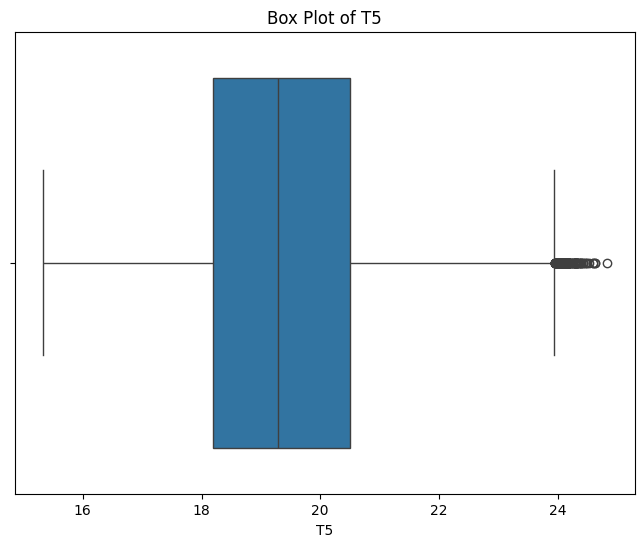

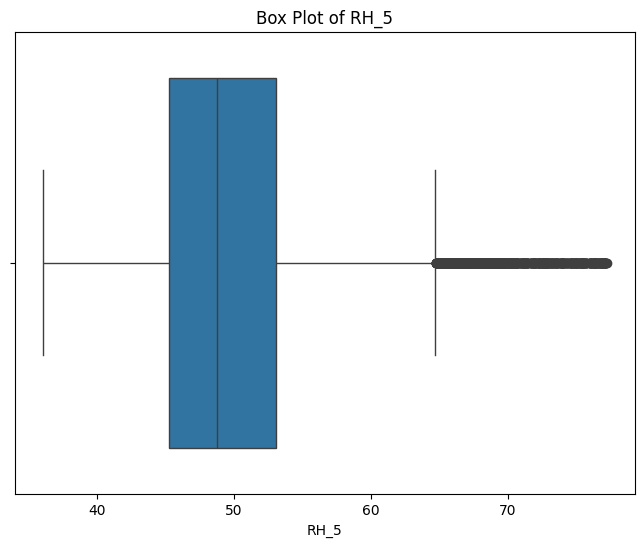

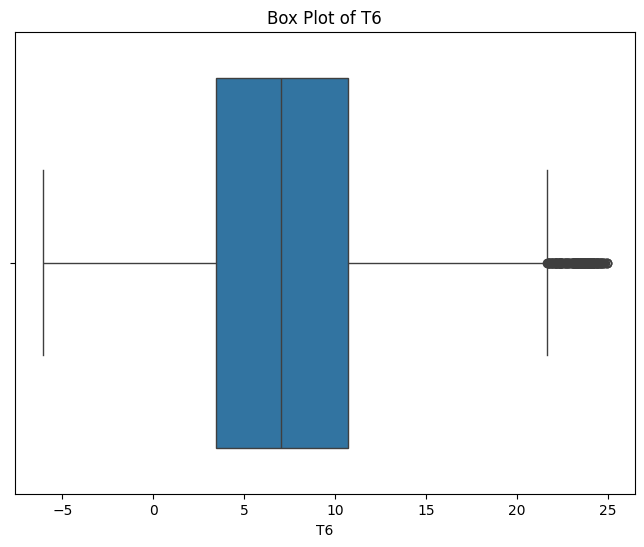

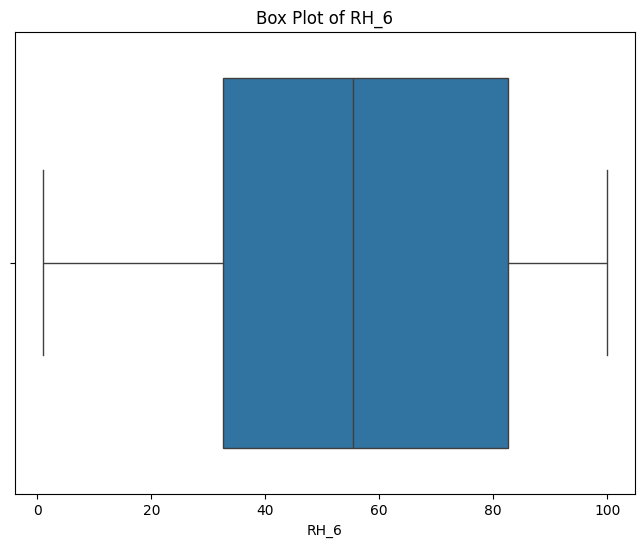

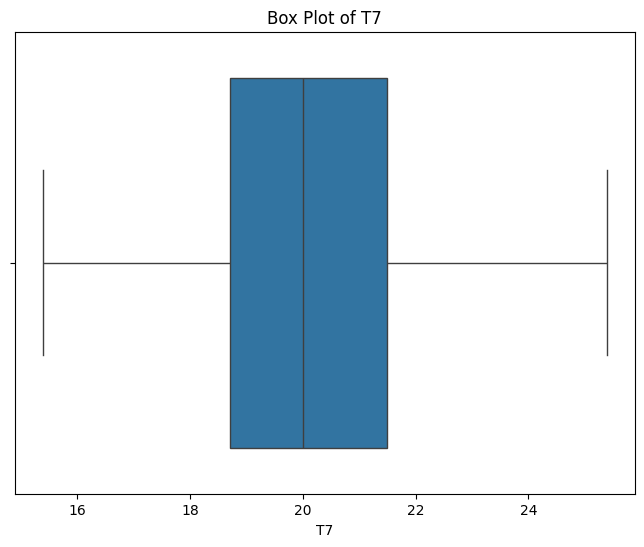

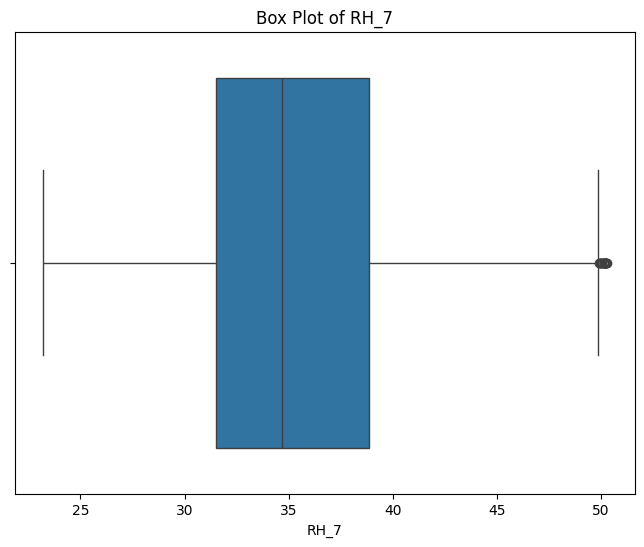

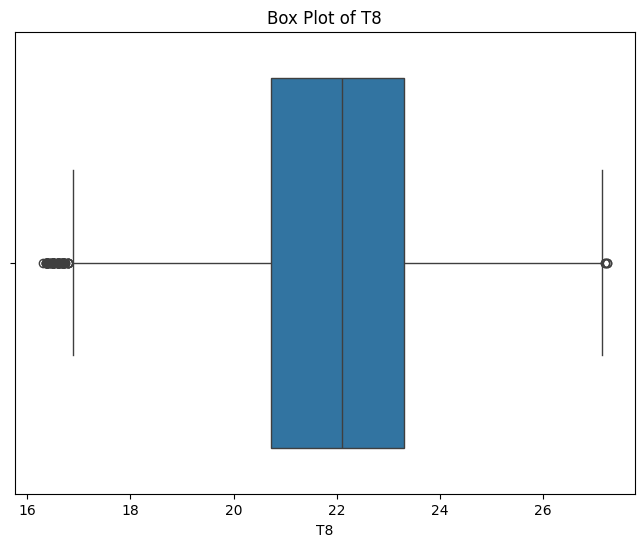

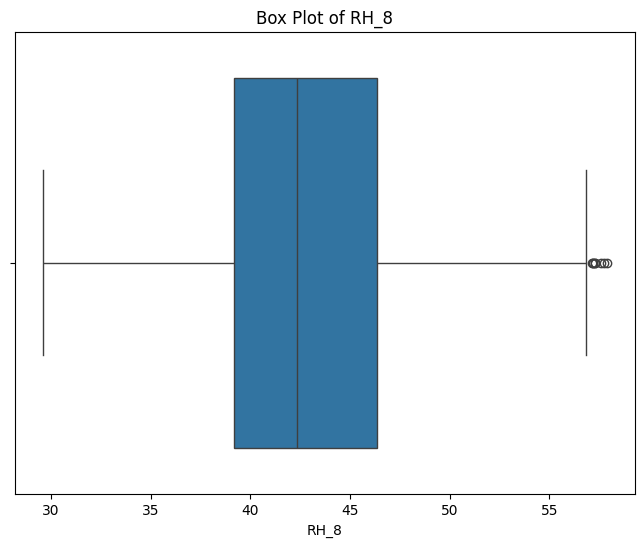

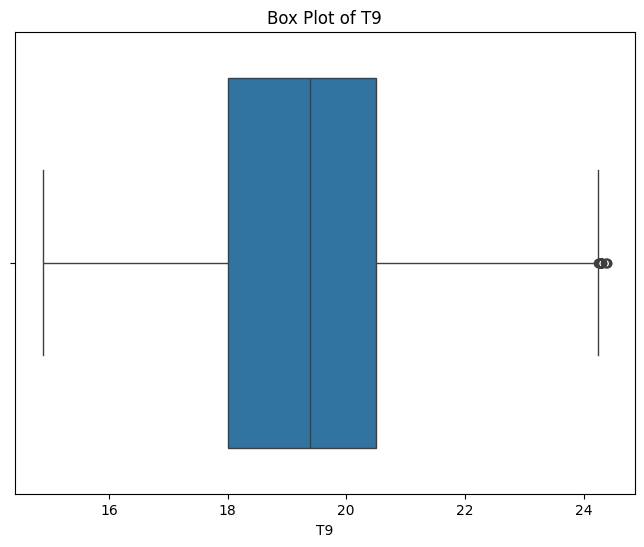

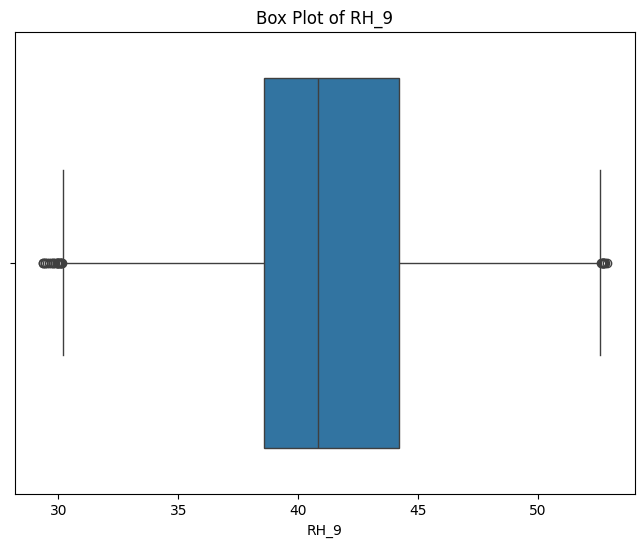

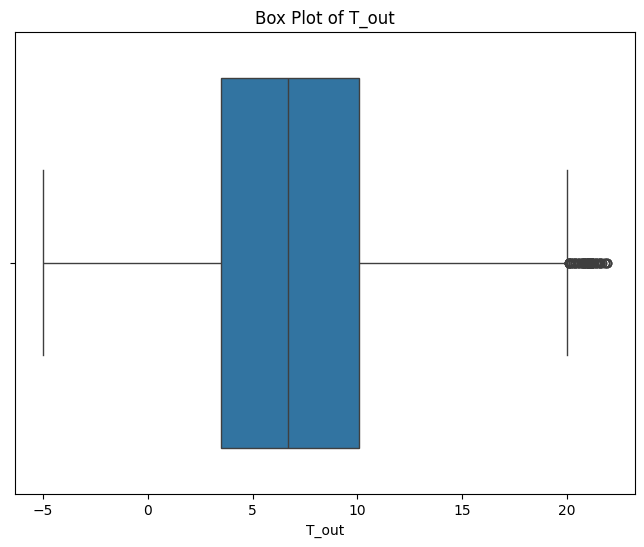

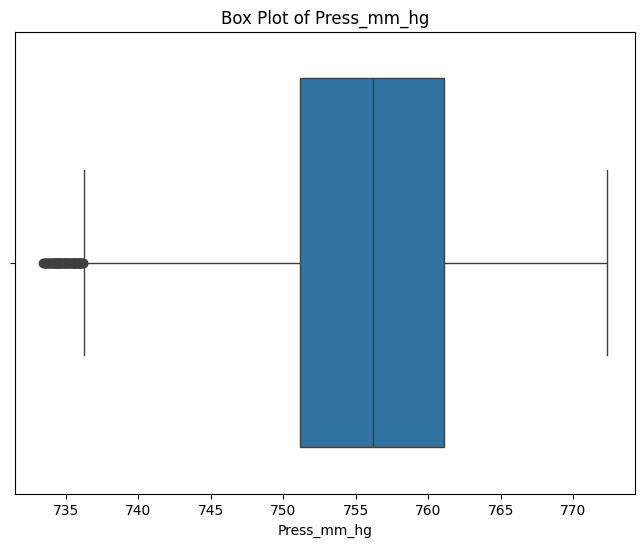

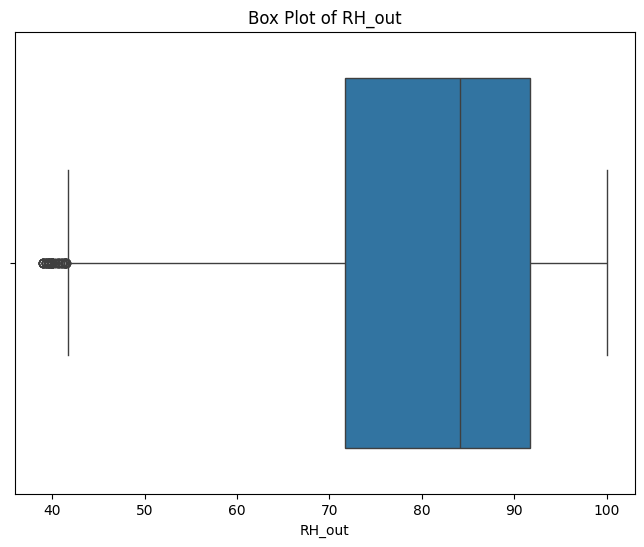

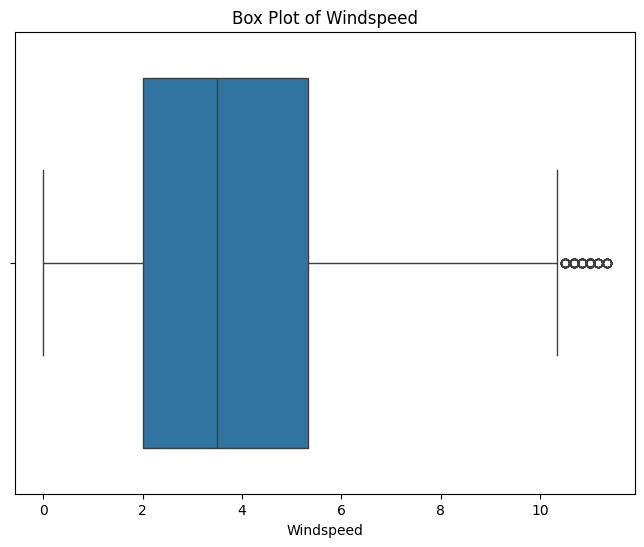

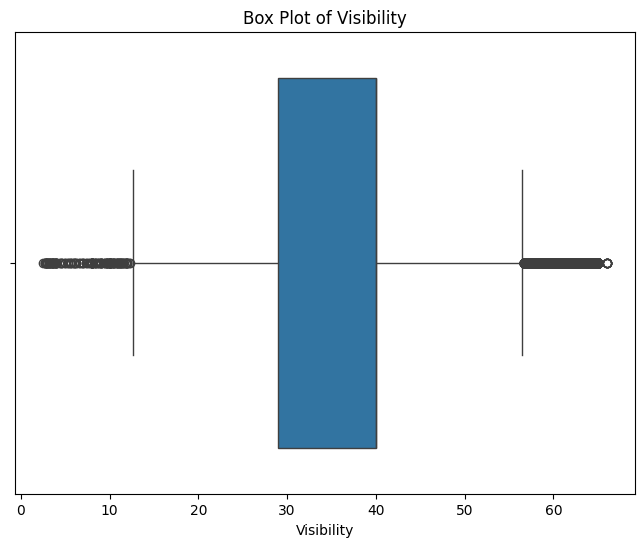

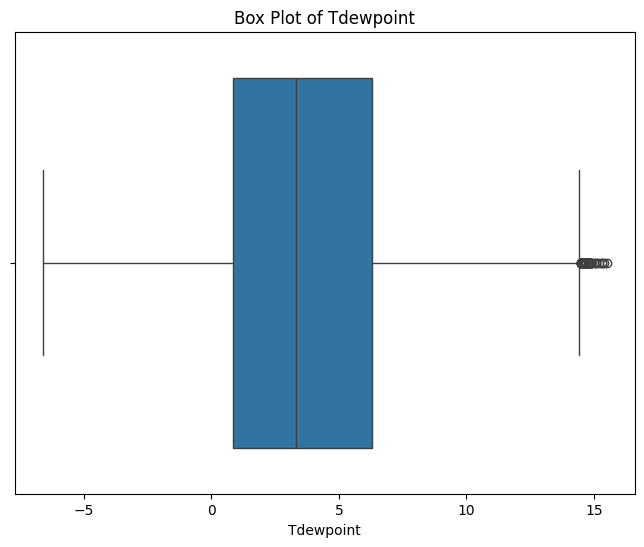

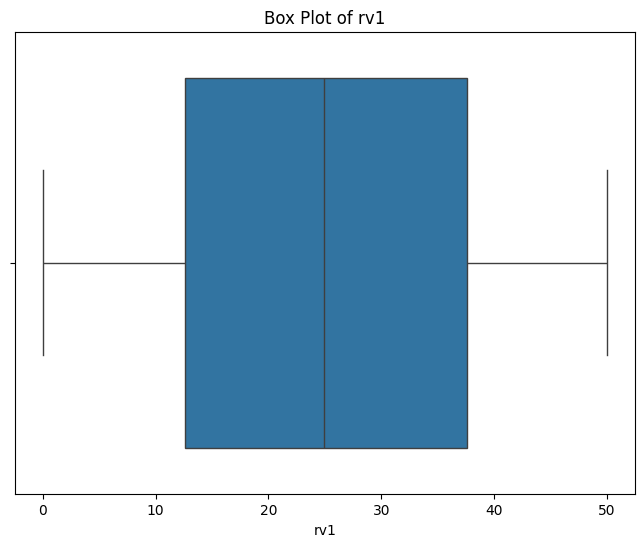

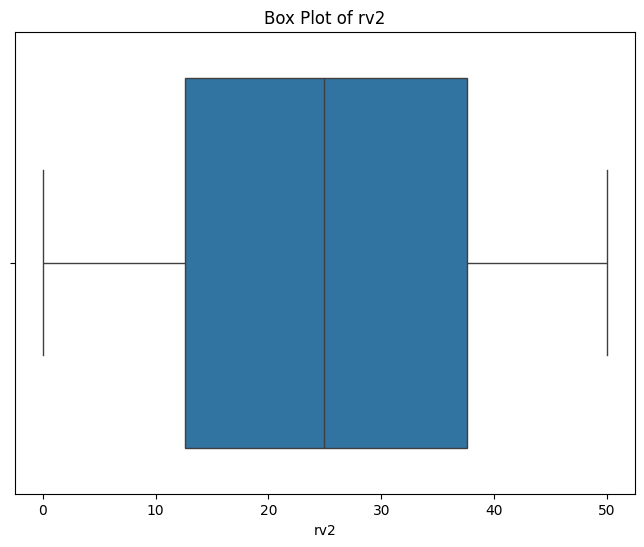

In [18]:
# plotting box plot of each column in energy_data

numeric_cols = energy_data.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=energy_data[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


## **Resetting indexes**

In [19]:
energy_data.reset_index()

index  Appliances  lights         T1       RH_1         T2       RH_2  \
0         27         100      20  21.356667  45.826667  20.666667  45.163333   
1         28         100      20  21.390000  45.690000  20.700000  45.060000   
2         29         100      20  21.500000  45.333333  20.700000  44.933333   
3         30         110      20  21.500000  45.126667  20.790000  44.633333   
4         31         400      20  21.533333  44.966667  20.790000  44.360000   
...      ...         ...     ...        ...        ...        ...        ...   
17110  19692         190       0  24.100000  48.333333  26.850000  39.750000   
17111  19693          70       0  24.166667  48.460000  26.890000  39.564286   
17112  19694         400       0  24.230000  48.466667  26.790000  39.500000   
17113  19696         330       0  24.323333  47.833333  26.680000  39.696000   
17114  19697         250       0  24.390000  47.566667  26.628571  39.928571   

              T3       RH_3         T4  ...         T9       RH_9  T_out  \
0      20.390000  46.090000  19.390000  ...  16.890000  44.790000   5.80   
1      20.390000  46.090000  19.426667  ...  16.890000  44.700000   5.73   
2      20.390000  46.060000  19.566667  ...  16.890000  44.700000   5.67   
3      20.390000  46.000000  19.666667  ...  16.823333  44.590000   5.60   
4      20.426667  45.933333  19.600000  ...  16.823333  44.530000   5.65   
...          ...        ...        ...  ...        ...        ...    ...   
17110  27.666667  43.360000  24.500000  ...  23.000000  46.090000  18.20   
17111  27.700000  42.766667  24.500000  ...  23.000000  46.163333  18.50   
17112  27.633333  42.226667  24.463333  ...  23.033333  46.156667  18.80   
17113  27.666667  42.423333  24.500000  ...  23.033333  46.156667  19.40   
17114  27.926667  42.993333  24.500000  ...  23.100000  46.290000  19.70   

       Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint        rv1  \
0       735.600000  87.500000   6.000000   40.000000       3.80  19.119398   
1       735.666667  87.666667   6.000000   40.000000       3.77  43.484542   
2       735.733333  87.833333   6.000000   40.000000       3.73  17.017450   
3       735.800000  88.000000   6.000000   40.000000       3.70  24.104006   
4       735.883333  87.833333   6.166667   40.000000       3.72  29.978291   
...            ...        ...        ...         ...        ...        ...   
17110   756.200000  71.000000   2.000000   63.000000      12.80  48.402928   
17111   756.183333  70.333333   1.833333   63.333333      12.90  26.670008   
17112   756.166667  69.666667   1.666667   63.666667      13.10   3.673609   
17113   756.133333  68.333333   1.333333   64.333333      13.40   2.349840   
17114   756.116667  67.666667   1.166667   64.666667      13.60   9.110549   

             rv2  
0      19.119398  
1      43.484542  
2      17.017450  
3      24.104006  
4      29.978291  
...          ...  
17110  48.402928  
17111  26.670008  
17112   3.673609  
17113   2.349840  
17114   9.110549  

[17115 rows x 29 columns]

## **Defining Independent variables as 'x' and dependent variable as 'y':**

In [20]:
# defining variable y as Appliance column in energy_data and define variable x as all columns in energy_data except Appliances

y = energy_data['Appliances']
x = energy_data.drop('Appliances', axis=1)


In [21]:
x

lights         T1       RH_1         T2       RH_2         T3  \
27         20  21.356667  45.826667  20.666667  45.163333  20.390000   
28         20  21.390000  45.690000  20.700000  45.060000  20.390000   
29         20  21.500000  45.333333  20.700000  44.933333  20.390000   
30         20  21.500000  45.126667  20.790000  44.633333  20.390000   
31         20  21.533333  44.966667  20.790000  44.360000  20.426667   
...       ...        ...        ...        ...        ...        ...   
19692       0  24.100000  48.333333  26.850000  39.750000  27.666667   
19693       0  24.166667  48.460000  26.890000  39.564286  27.700000   
19694       0  24.230000  48.466667  26.790000  39.500000  27.633333   
19696       0  24.323333  47.833333  26.680000  39.696000  27.666667   
19697       0  24.390000  47.566667  26.628571  39.928571  27.926667   

            RH_3         T4       RH_4         T5  ...         T9       RH_9  \
27     46.090000  19.390000  47.500000  18.600000  ...  16.890000  44.790000   
28     46.090000  19.426667  47.993333  18.666667  ...  16.890000  44.700000   
29     46.060000  19.566667  48.466667  18.823333  ...  16.890000  44.700000   
30     46.000000  19.666667  48.093333  18.963333  ...  16.823333  44.590000   
31     45.933333  19.600000  47.500000  19.033333  ...  16.823333  44.530000   
...          ...        ...        ...        ...  ...        ...        ...   
19692  43.360000  24.500000  44.500000  22.566667  ...  23.000000  46.090000   
19693  42.766667  24.500000  44.500000  22.533333  ...  23.000000  46.163333   
19694  42.226667  24.463333  44.430000  22.600000  ...  23.033333  46.156667   
19696  42.423333  24.500000  44.363333  22.600000  ...  23.033333  46.156667   
19697  42.993333  24.500000  44.363333  22.666667  ...  23.100000  46.290000   

       T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
27      5.80   735.600000  87.500000   6.000000   40.000000       3.80   
28      5.73   735.666667  87.666667   6.000000   40.000000       3.77   
29      5.67   735.733333  87.833333   6.000000   40.000000       3.73   
30      5.60   735.800000  88.000000   6.000000   40.000000       3.70   
31      5.65   735.883333  87.833333   6.166667   40.000000       3.72   
...      ...          ...        ...        ...         ...        ...   
19692  18.20   756.200000  71.000000   2.000000   63.000000      12.80   
19693  18.50   756.183333  70.333333   1.833333   63.333333      12.90   
19694  18.80   756.166667  69.666667   1.666667   63.666667      13.10   
19696  19.40   756.133333  68.333333   1.333333   64.333333      13.40   
19697  19.70   756.116667  67.666667   1.166667   64.666667      13.60   

             rv1        rv2  
27     19.119398  19.119398  
28     43.484542  43.484542  
29     17.017450  17.017450  
30     24.104006  24.104006  
31     29.978291  29.978291  
...          ...        ...  
19692  48.402928  48.402928  
19693  26.670008  26.670008  
19694   3.673609   3.673609  
19696   2.349840   2.349840  
19697   9.110549   9.110549  

[17115 rows x 27 columns]

In [22]:
y

27       100
28       100
29       100
30       110
31       400
        ... 
19692    190
19693     70
19694    400
19696    330
19697    250
Name: Appliances, Length: 17115, dtype: int64

## **Checking linearity using Scatter Plot**

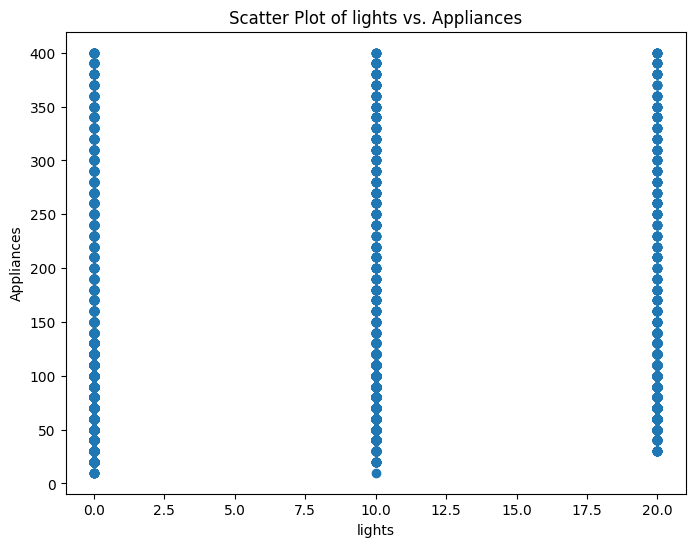

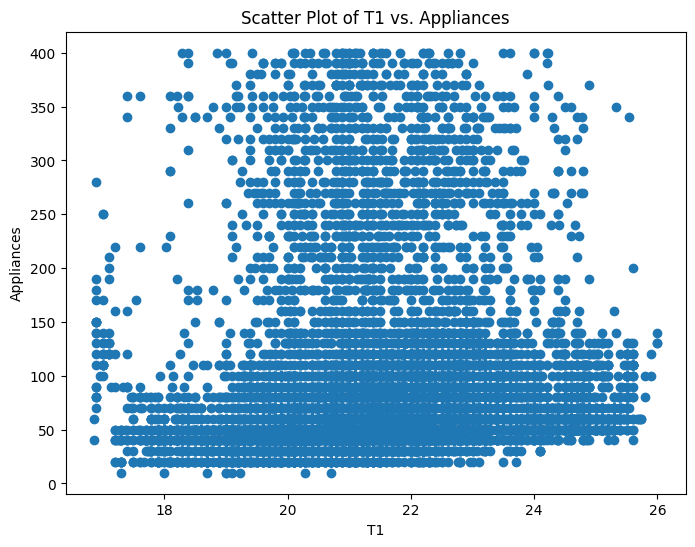

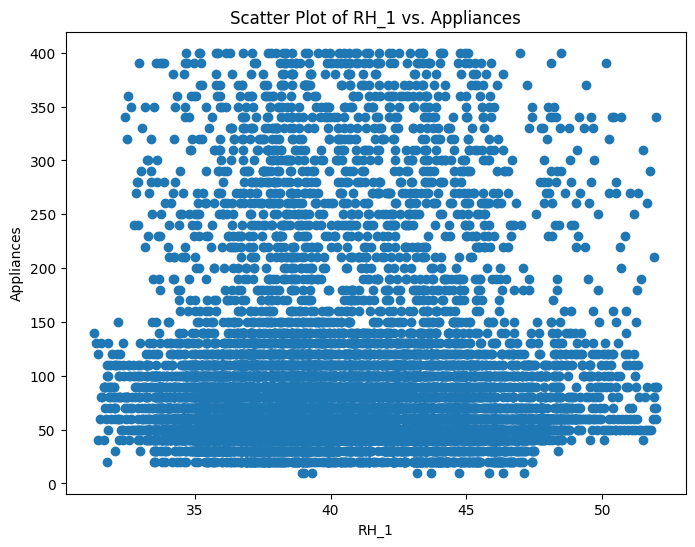

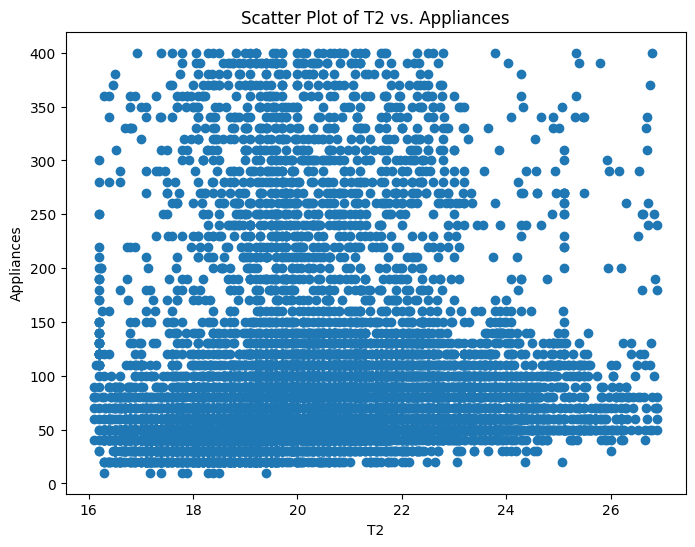

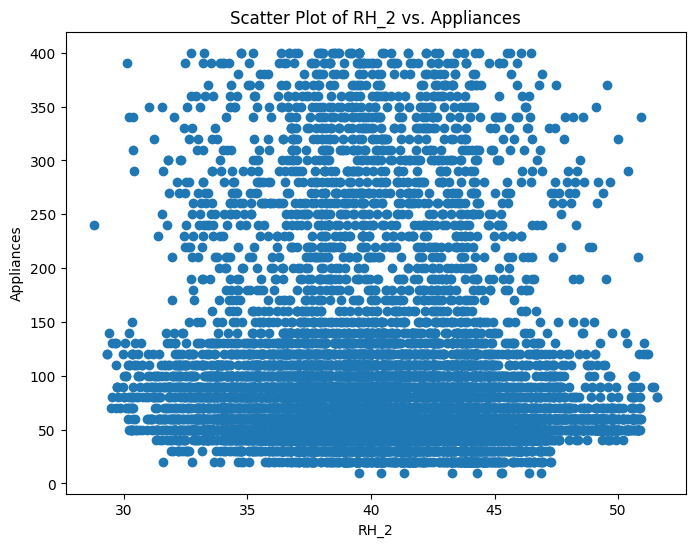

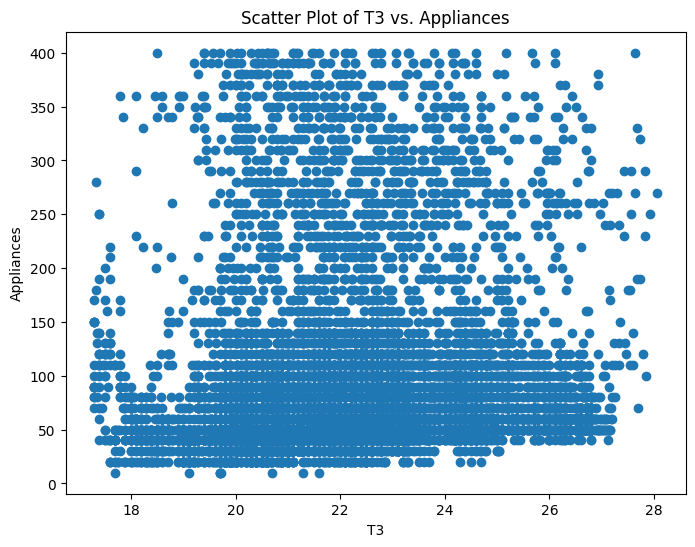

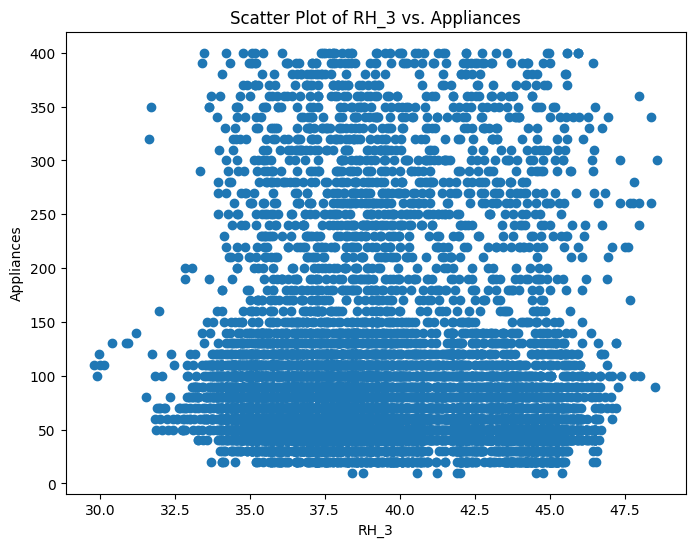

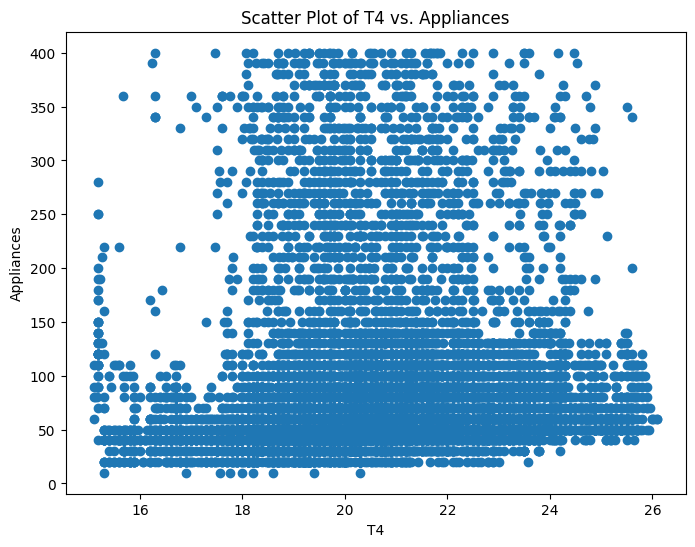

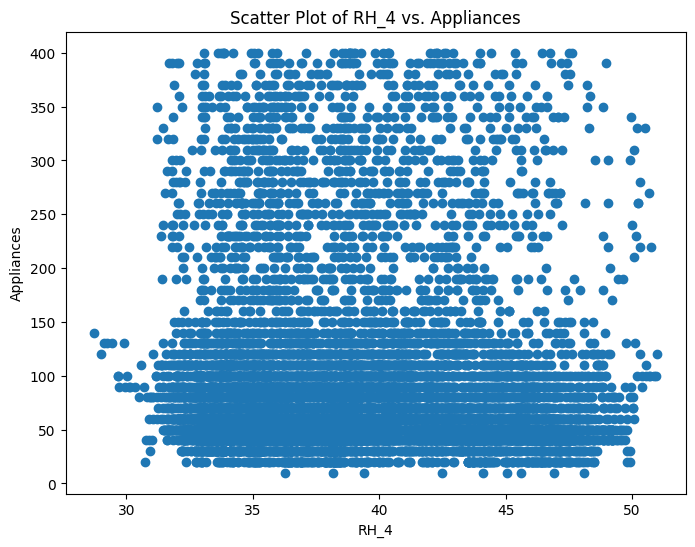

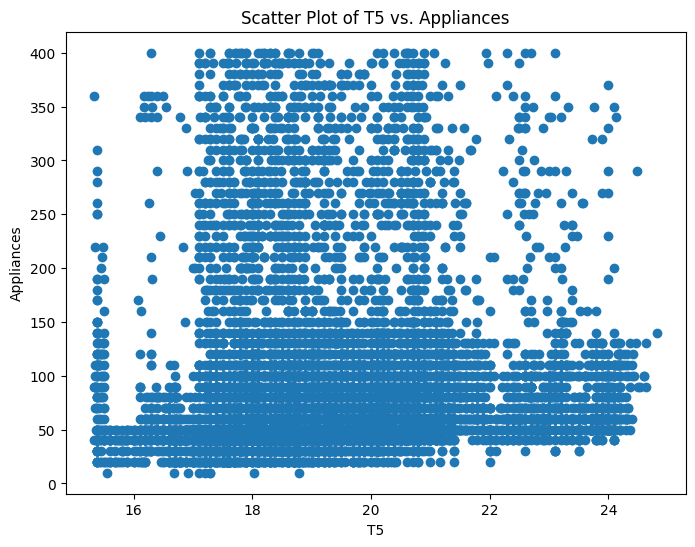

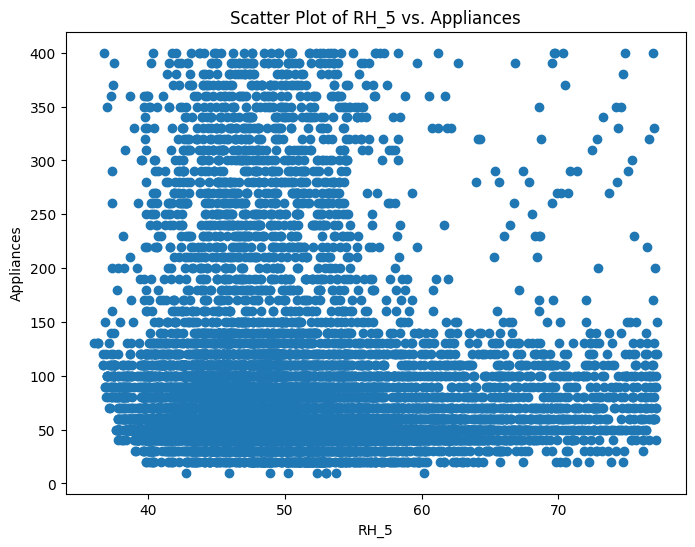

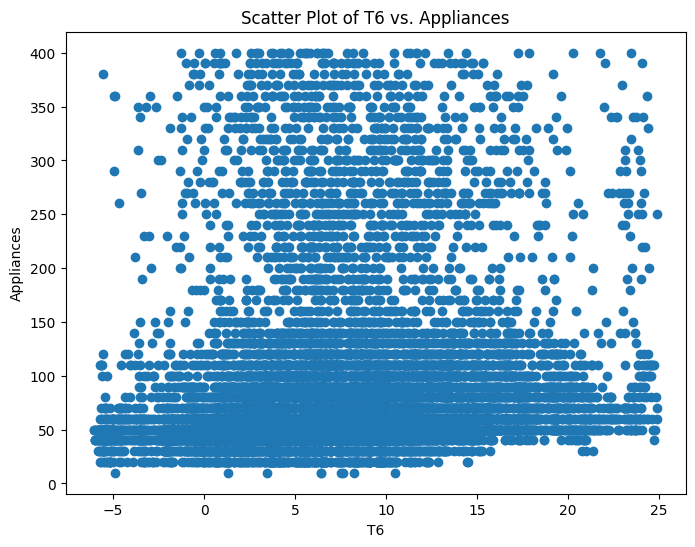

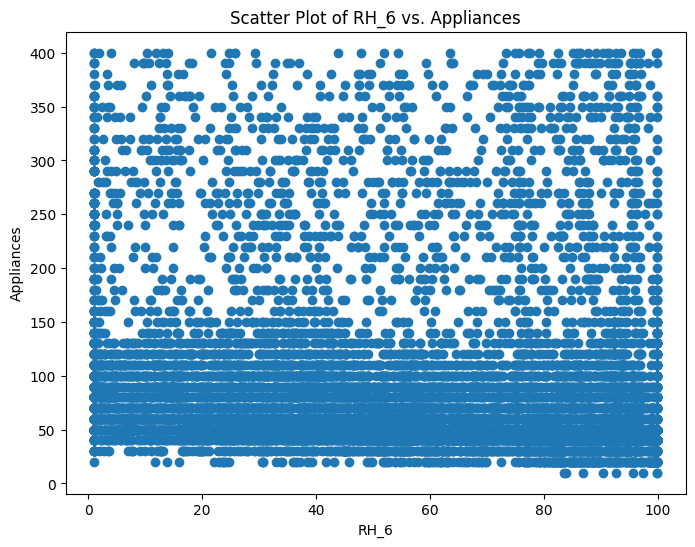

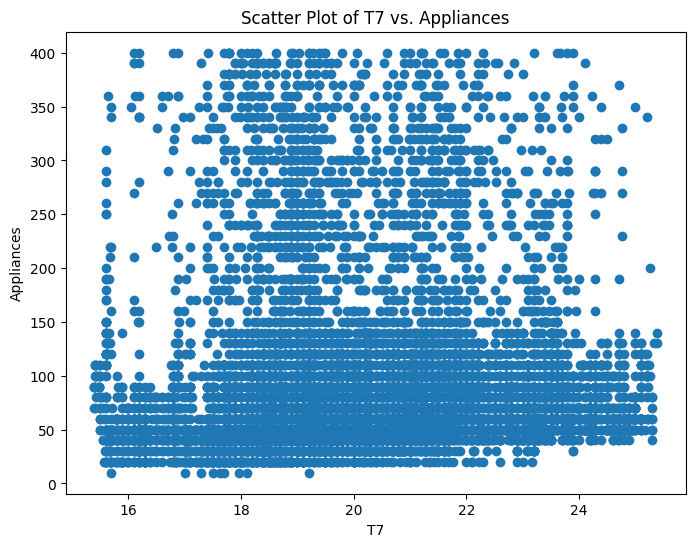

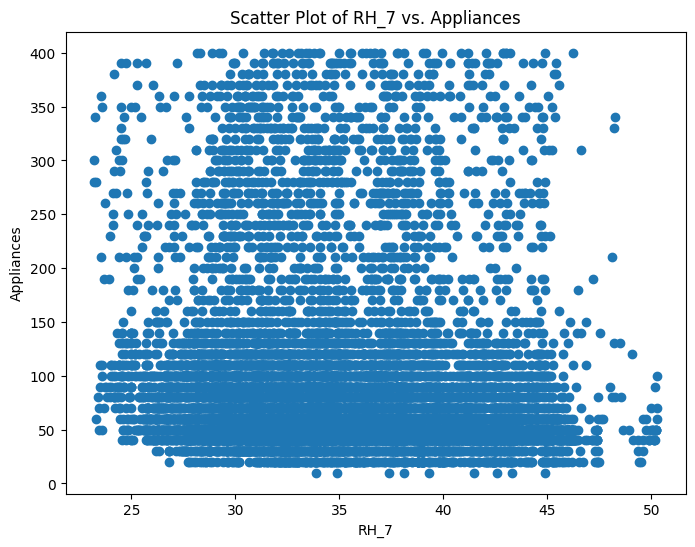

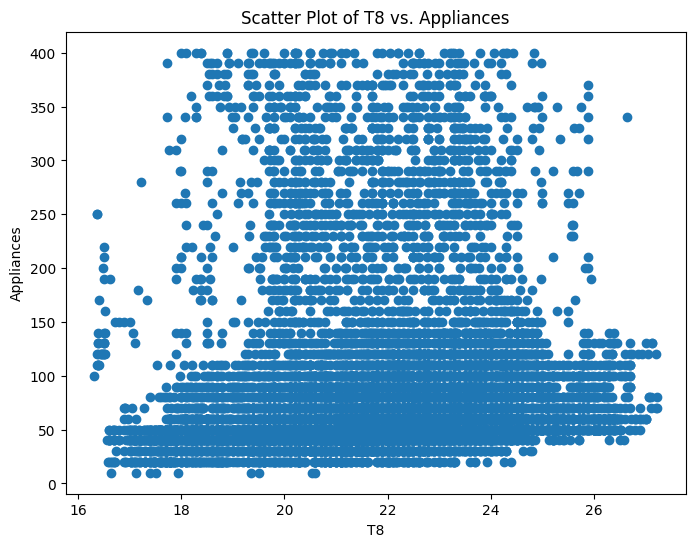

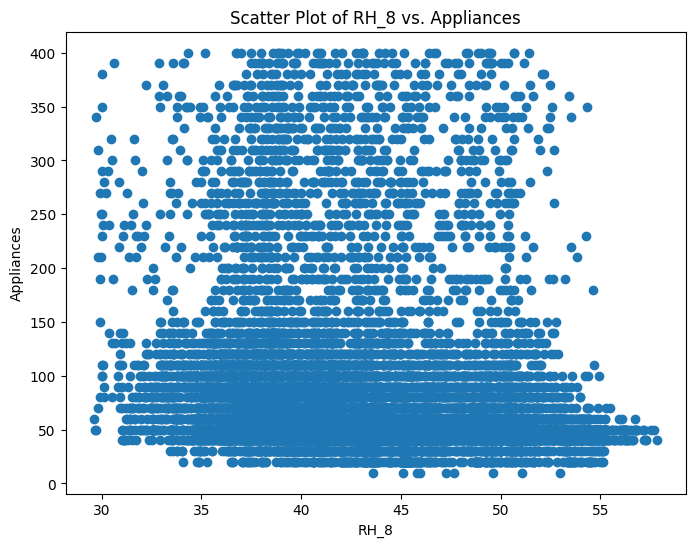

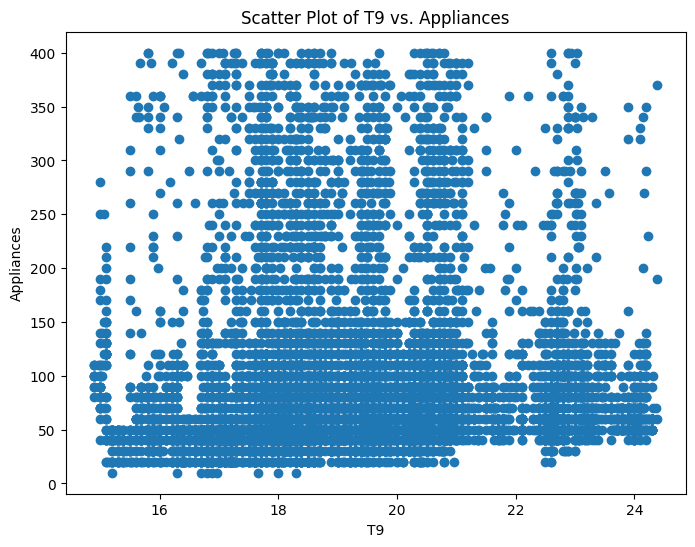

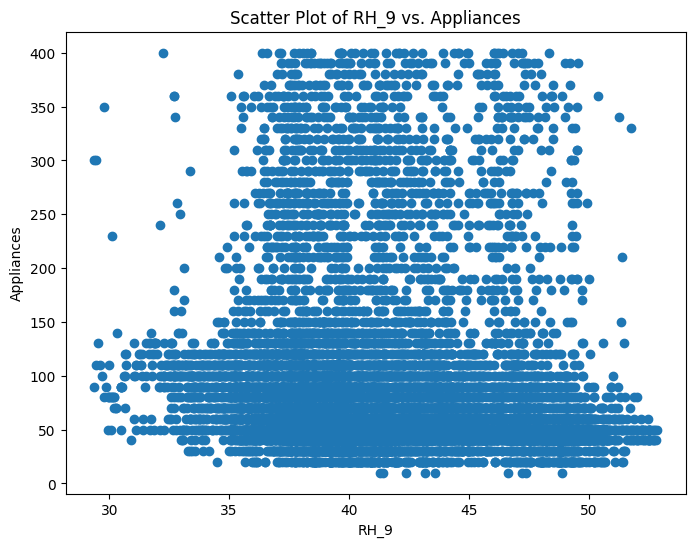

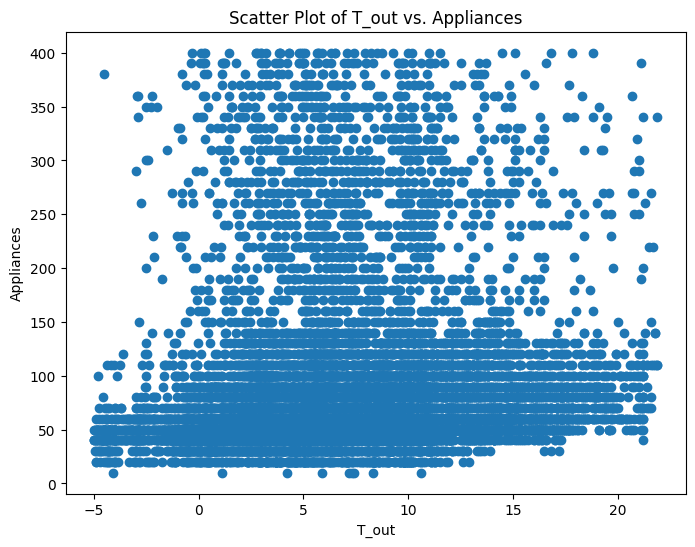

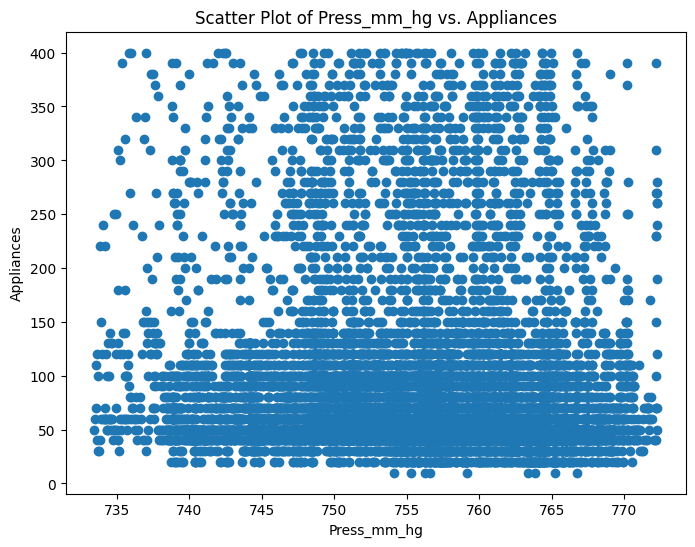

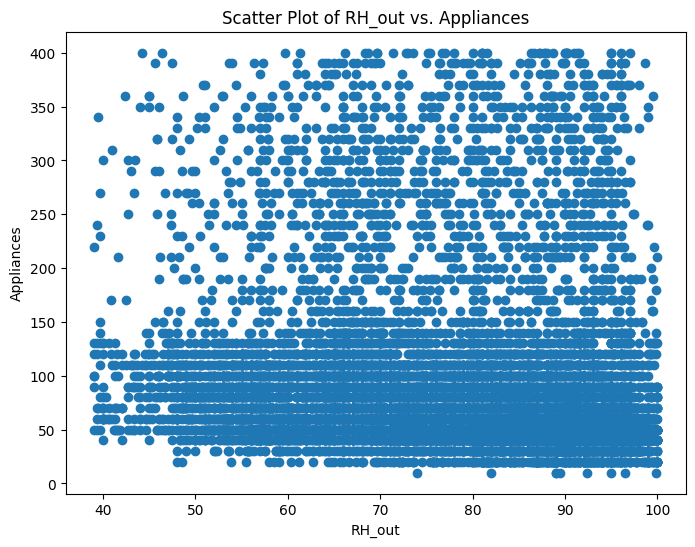

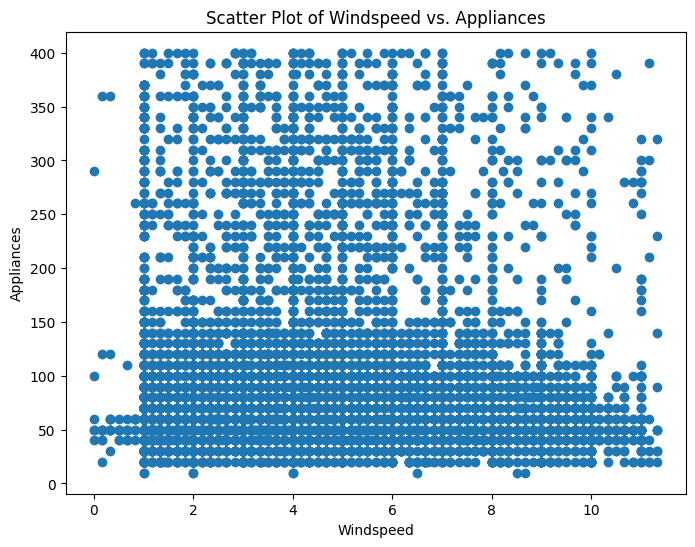

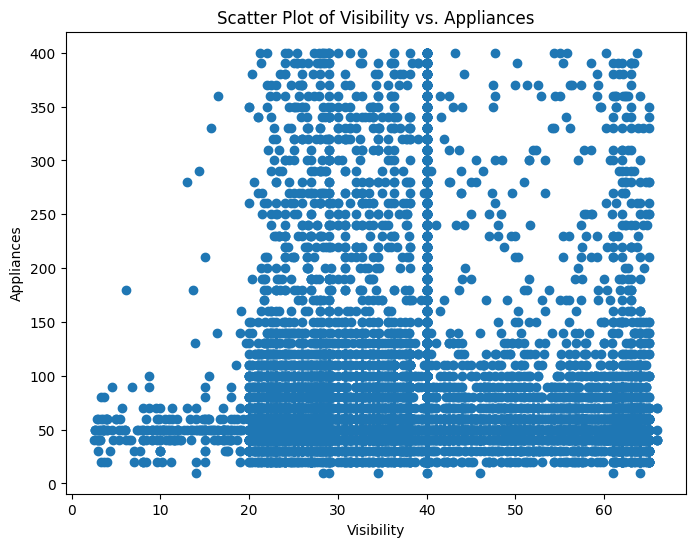

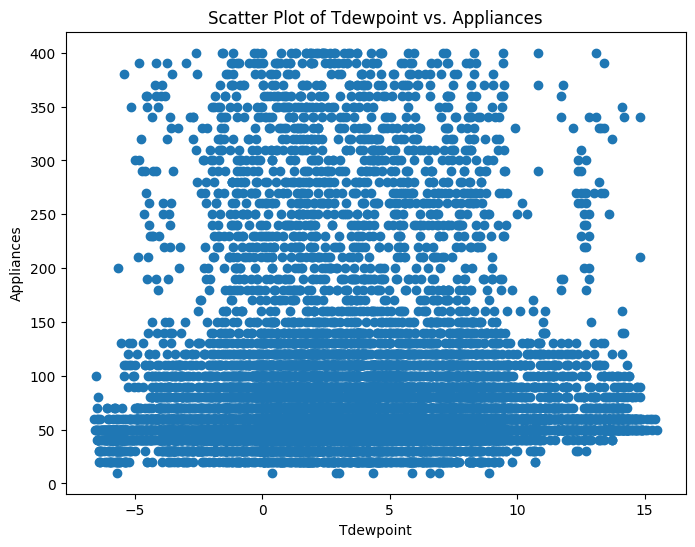

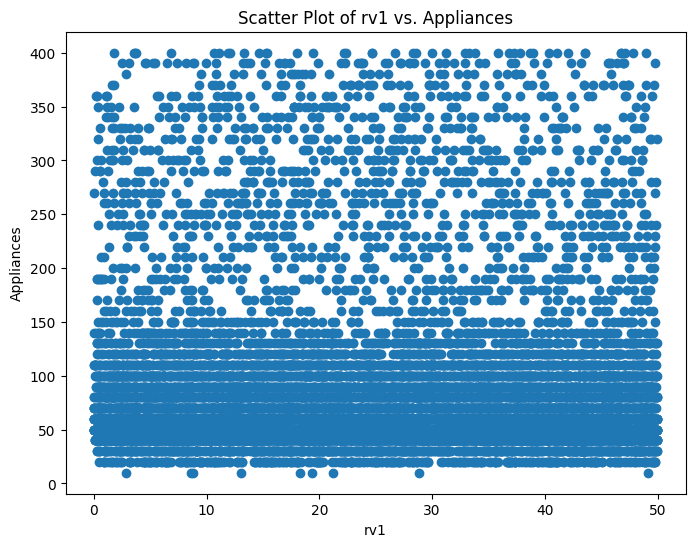

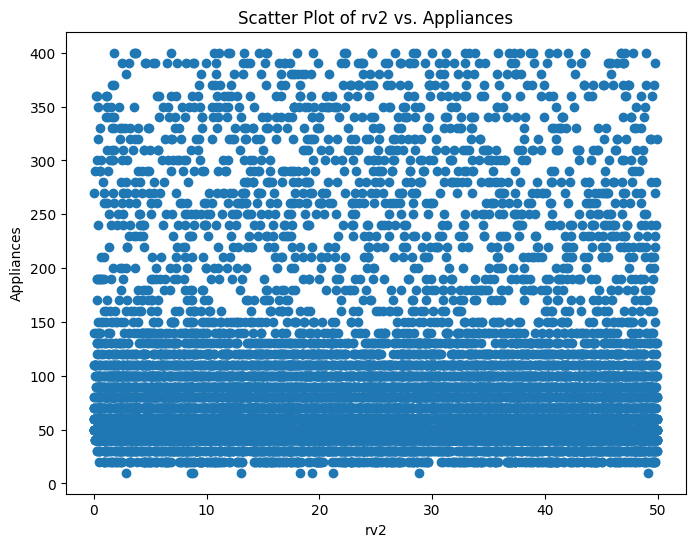

In [23]:
# plot scatter plots of x and y

import matplotlib.pyplot as plt

for col in x.columns:
  plt.figure(figsize=(8, 6))
  plt.scatter(x[col], y)
  plt.xlabel(col)
  plt.ylabel('Appliances')
  plt.title(f'Scatter Plot of {col} vs. Appliances')
  plt.show()


## **Extracting Correlation Matrix:**

Correlation of each feature with Appliances:
lights         0.200454
T1             0.073354
RH_1           0.048398
T2             0.136111
RH_2          -0.090294
T3             0.093519
RH_3          -0.005897
T4             0.056754
RH_4          -0.025532
T5             0.028840
RH_5          -0.043424
T6             0.137352
RH_6          -0.117311
T7             0.044317
RH_7          -0.101039
T8             0.074271
RH_8          -0.157254
T9             0.029867
RH_9          -0.103284
T_out          0.111761
Press_mm_hg   -0.047466
RH_out        -0.187208
Windspeed      0.085978
Visibility    -0.003894
Tdewpoint      0.008230
rv1           -0.004281
rv2           -0.004281
dtype: float64


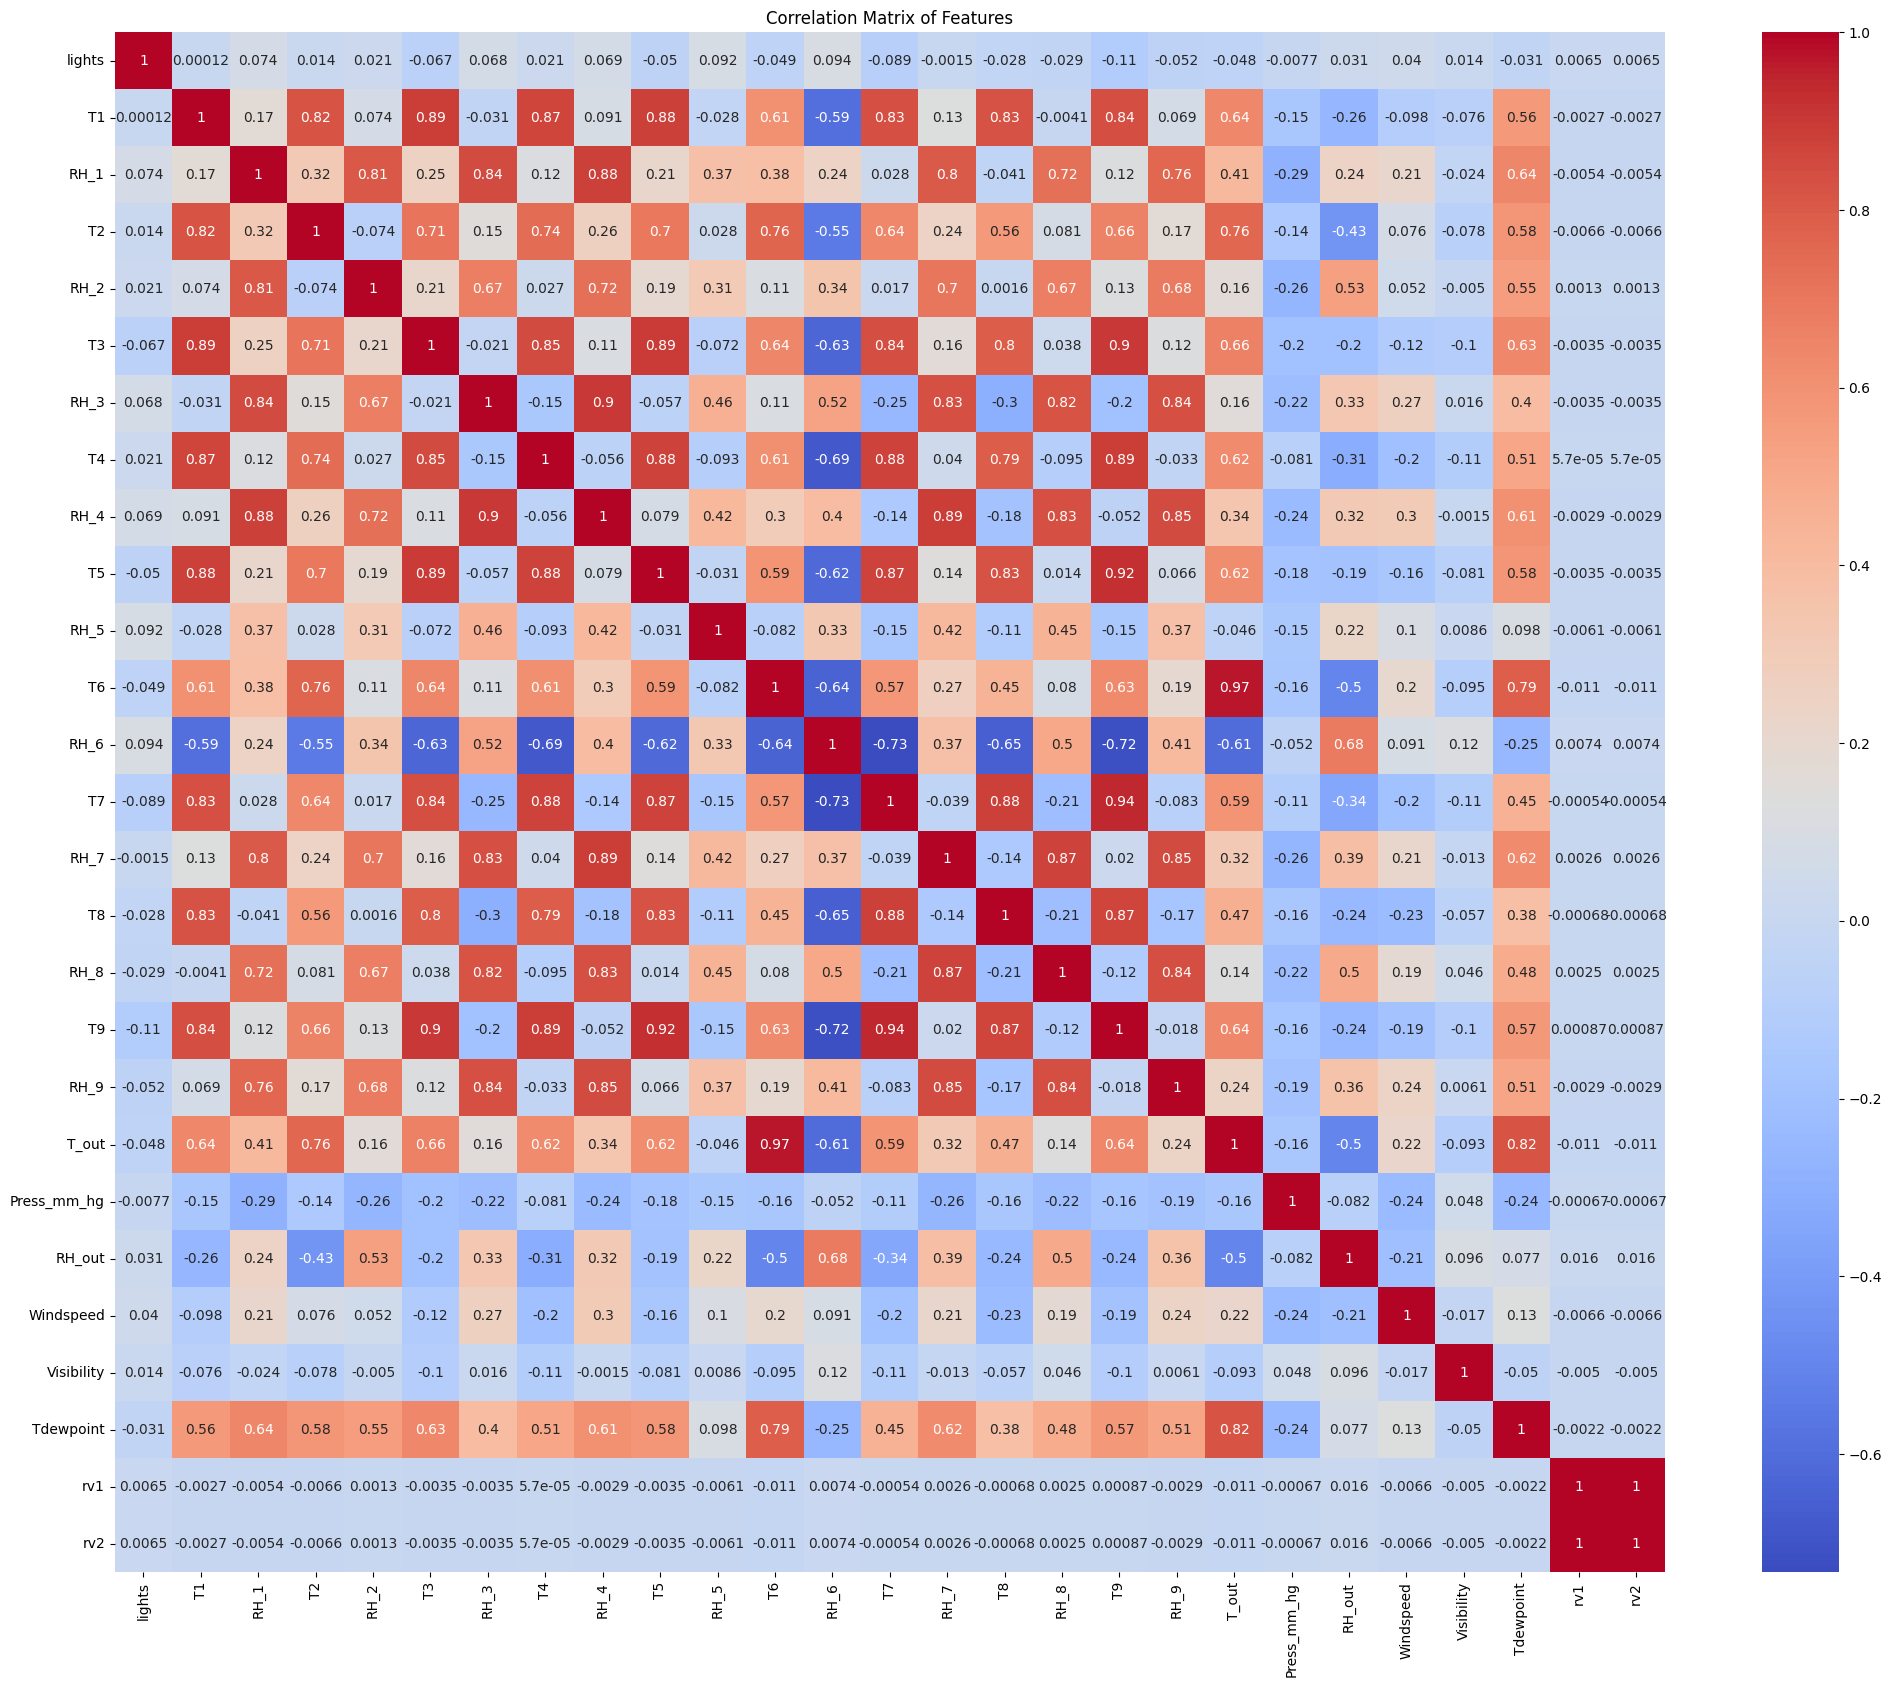

In [24]:
# calculate correlation of x and y and generate heatmap

correlation_matrix = x.corrwith(y)

print("Correlation of each feature with Appliances:")
print(correlation_matrix)

plt.figure(figsize=(25, 20))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


## **Checking Multi-colinearity using Variance Inflation Factor**

In [25]:
# calculating vif to check multi-colimearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["features"] = x.columns
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


features   VIF Factor
0        lights     1.481530
1            T1  3951.586530
2          RH_1  2111.581082
3            T2  2795.275163
4          RH_2  2459.757258
5            T3  1316.351801
6          RH_3  1746.565516
7            T4  1059.078065
8          RH_4  1458.934833
9            T5  1317.402876
10         RH_5    77.195479
11           T6    75.545379
12         RH_6    40.834712
13           T7  1633.704005
14         RH_7   505.526388
15           T8  1013.866636
16         RH_8   574.282357
17           T9  2615.153793
18         RH_9   644.353660
19        T_out   695.017876
20  Press_mm_hg  3446.335686
21       RH_out  2402.044967
22    Windspeed     5.344161
23   Visibility    11.884757
24    Tdewpoint   264.860235
25          rv1          inf
26          rv2          inf

## **Dropping the Columns containing Multi-colinearity**

In [26]:
# Dropping columns 'rv1' and 'rv2'
energy_data = energy_data.drop(['rv1', 'rv2'], axis=1)

In [27]:
energy_data.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint'],
      dtype='object')

## **Extracting Multiple Linear regression Model**

In [28]:
# extracting multiple linear regression model on energy_data and display model summary and all p values

import statsmodels.api as sm
x = sm.add_constant(x) # Adding a constant term to the independent variables
model = sm.OLS(y, x).fit()
print(model.summary())

print("\nP-values for each coefficient:")
model.pvalues


                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     154.5
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:25:18   Log-Likelihood:                -94249.
No. Observations:               17115   AIC:                         1.886e+05
Df Residuals:                   17088   BIC:                         1.888e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2290     69.907      0.018      

const           9.859740e-01
lights          2.167218e-81
T1              6.028454e-01
RH_1            9.043170e-75
T2              5.499579e-21
RH_2            1.994683e-50
T3             6.570315e-109
RH_3            1.262963e-27
T4              3.189770e-02
RH_4            8.438049e-03
T5              6.996682e-01
RH_5            2.238227e-01
T6              5.404141e-39
RH_6            7.088198e-09
T7              5.358792e-04
RH_7            5.603282e-01
T8              1.968113e-39
RH_8            9.352085e-75
T9              2.778020e-15
RH_9            3.602154e-04
T_out           3.042654e-02
Press_mm_hg     8.711626e-01
RH_out          7.338116e-01
Windspeed       3.546791e-09
Visibility      2.138811e-02
Tdewpoint       6.065602e-01
rv1             8.514676e-01
rv2             8.514676e-01
dtype: float64

## ***Dropping all Insignificant Independent Variables stepwise ***

In [29]:
# dropping all columns from variable x having p value>0.05, one by one in descending order, also display stepwise output, model summary, and all p values

import pandas as pd
import statsmodels.api as sm

x = energy_data.drop('Appliances', axis=1)
y = energy_data['Appliances']

x = sm.add_constant(x)  # Adding a constant term to the independent variables

# Iterate and remove columns based on p-values
columns_to_remove = []
while True:
    model = sm.OLS(y, x).fit()
    print(model.summary())
    print("\nP-values for each coefficient:\n", model.pvalues)

    p_values = model.pvalues.drop('const') #exclude intercept
    max_p_value = p_values.max()

    if max_p_value > 0.05:
        column_to_remove = p_values.idxmax()
        print(f"\nRemoving column '{column_to_remove}' with p-value {max_p_value:.3f}")
        columns_to_remove.append(column_to_remove)
        x = x.drop(column_to_remove, axis=1)
    else:
        break

print("\nFinal Model Summary:")
final_model = sm.OLS(y, x).fit()
print(final_model.summary())
print("\nFinal p-values:\n", final_model.pvalues)
print("\nColumns removed:", columns_to_remove)


                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     160.7
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:28:19   Log-Likelihood:                -94249.
No. Observations:               17115   AIC:                         1.886e+05
Df Residuals:                   17089   BIC:                         1.888e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.3978     69.899      0.020      

Interpretation- Out of 27 independent variables only 18 remain significant. r-squared value = 0.190 implies 19% of the change in dependent variable is estimated by the 18 statistically significant independent variables.

# **Model Diagnostics: Testing the model**

## **Checking wether Residuals are Normally Distributed**

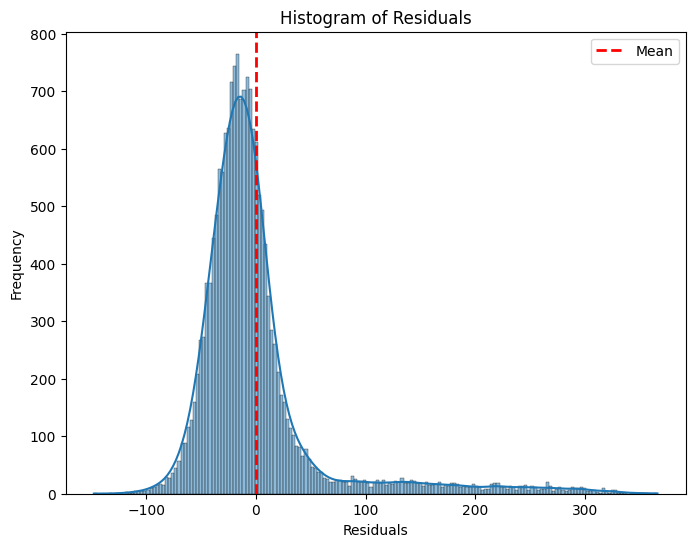

In [30]:
# displaying residuals and plot residuals on histogram with line to check normal distribution

# Get the residuals
residuals = final_model.resid

# Display the residuals
# print("Residuals:\n", residuals)

# Plot the residuals on a histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Add a line to check for normal distribution
plt.axvline(residuals.mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.show()


## **Cheking wether the Residuals exhibit Homoscedasticity **

## **Using Scatter Plot**

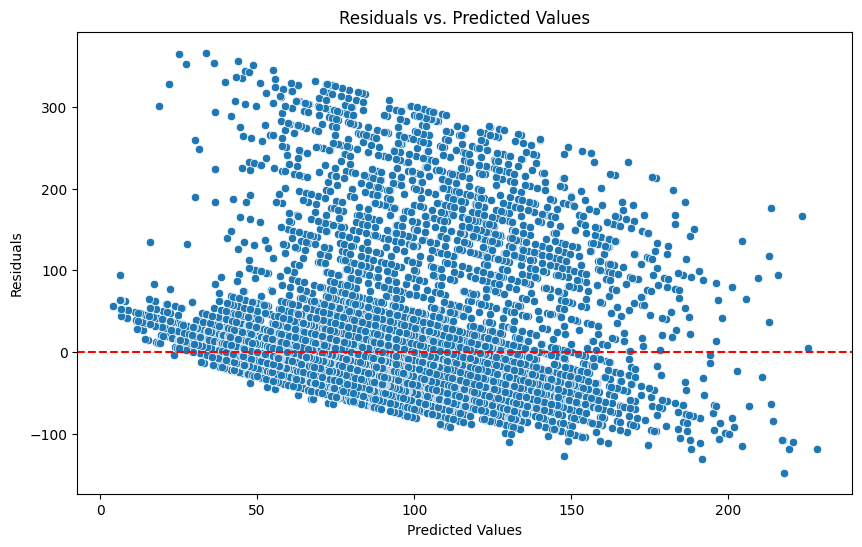

In [31]:
# plot residuals in scatter plot

import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted values
predicted_values = final_model.fittedvalues

# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_values, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


## **Using white test to confirm the Hypothesis**

In [32]:
# checking for homoscadasticity in residuals using white test and display model summary

from statsmodels.stats.diagnostic import het_white

# Perform White's test for heteroscedasticity
white_test = het_white(final_model.resid, final_model.model.exog)

# Print the test results
print("White's Test for Heteroscedasticity:")
labels = ['Test Statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, white_test)))

# Interpret the results
if white_test[1] < 0.05:
    print("\nReject the null hypothesis: Heteroscedasticity is present in the residuals.")
else:
    print("\nFail to reject the null hypothesis: No evidence of heteroscedasticity.")

print("\nFinal Model Summary:")
print(final_model.summary())


White's Test for Heteroscedasticity:
{'Test Statistic': np.float64(1789.7404377186765), 'p-value': np.float64(2.2438639215522225e-258), 'f-value': np.float64(10.45801077774083), 'f p-value': np.float64(6.5736927717608915e-276)}

Reject the null hypothesis: Heteroscedasticity is present in the residuals.

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     223.1
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:33:19   Log-Likelihood:                -94251.
No. Observations:               17115   AIC:                         1.885e+05
Df Residuals:                   17096   BIC:                         1.887e+05
Df Model:                          18    

Scatter plot exhibitted Heteroscadasticity in residuals and white test confirmed the Hypothesis.

R-squared remained 0.190, which implies that the using MLR model for this data is not the best fit.

Using other regressions model like random forest and neural network will increase the accuracy of the model.